# Predicting Voting Method in North Carolina in the 2020 General Election

<font size=3rem>
    
- **[Introduction](#Introduction)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# Introduction

# OBTAIN

In [1]:
## Import Numpy and set random seed for notebook
import numpy as np
np.random.seed(319)

In [2]:
## Import functions made specifically for this project
from capstone_functions import *

In [3]:
## Import remaining necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from tzlocal import get_localzone
import plotly.express as px

In [4]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

## 2020 Election Dataset

In [5]:
## Import and preview dataset
elec_df = pd.read_csv('Data/NC_gen_2020.zip',
                     dtype={'precinct_abbrv': str, 
                              'super_court_abbrv': str, 
                              'judic_dist_abbrv': str,
                              'school_dist_abbrv': str,
                              'vtd_abbrv': str
                             })
elec_df.drop(columns=['county_id'], inplace=True)

elec_df.head()

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020 party_cd  \
0   AA56273            0           85.0  ABSENTEE BY MAIL    Early      UNA   
1  AA201627            0           42.0  ABSENTEE ONESTOP    Early      UNA   
2  AA216996            0           54.0  ABSENTEE ONESTOP    Early      REP   
3   AA98377            0           44.0  ABSENTEE ONESTOP    Early      UNA   
4   AA69747            0           75.0  ABSENTEE ONESTOP    Early      UNA   

  gender_code  birth_year  registr_dt race_code ethnic_code  zip_code  \
0           F        1935  1984-10-01         W          NL   27253.0   
1           F        1978  2018-02-23         W          UN   27302.0   
2           M        1966  2020-10-31         W          UN   27302.0   
3           F        1976  1996-03-26         W          UN   27215.0   
4           F        1945  1989-08-15         W          NL   27215.0   

                    res_street_address res_city_desc state_cd birth_state  \
0  4430 E GREENSBORO-CHAPEL HILL RD           GRAHAM       NC          NY   
1                     117 W CLAY ST           MEBANE       NC          DC   
2               3670  COVINGTON TRL           MEBANE       NC          AL   
3                    421  WHITT AVE       BURLINGTON       NC          NC   
4                    1013  EDITH ST       BURLINGTON       NC          VA   

  drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  cong_dist_abbrv  \
0           N              1.0            08N       08N             13.0   
1           Y              1.0            10N       10N             13.0   
2           N              1.0            103       103             13.0   
3           Y              1.0            03S       03S             13.0   
4           Y              1.0            124       124             13.0   

  super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
0               15A              15A             24.0            64.0   
1               15A              15A             24.0            63.0   
2               15A              15A             24.0            63.0   
3               15A              15A             24.0            64.0   
4               15A              15A             24.0            63.0   

  school_dist_abbrv  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [6]:
len(elec_df)

7347946

In [7]:
## Load in voter registration data for NC
nc_vreg = pd.read_table('Data/ncvoter_Statewide.zip', encoding='ISO-8859-1',
                        usecols=['ncid', 'county_id'])
nc_vreg.head()

county_id      ncid
0          1   AA56273
1          1  AA201627
2          1  AA216996
3          1   AA98377
4          1   AA69747

In [8]:
## Merge county_id from voter registration info onto elec_df based on ncid
elec_df = elec_df.merge(nc_vreg, how='left', on='ncid')
# Inspect resulting df
elec_df.head()

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020 party_cd  \
0   AA56273            0           85.0  ABSENTEE BY MAIL    Early      UNA   
1  AA201627            0           42.0  ABSENTEE ONESTOP    Early      UNA   
2  AA216996            0           54.0  ABSENTEE ONESTOP    Early      REP   
3   AA98377            0           44.0  ABSENTEE ONESTOP    Early      UNA   
4   AA69747            0           75.0  ABSENTEE ONESTOP    Early      UNA   

  gender_code  birth_year  registr_dt race_code ethnic_code  zip_code  \
0           F        1935  1984-10-01         W          NL   27253.0   
1           F        1978  2018-02-23         W          UN   27302.0   
2           M        1966  2020-10-31         W          UN   27302.0   
3           F        1976  1996-03-26         W          UN   27215.0   
4           F        1945  1989-08-15         W          NL   27215.0   

                    res_street_address res_city_desc state_cd birth_state  \
0  4430 E GREENSBORO-CHAPEL HILL RD           GRAHAM       NC          NY   
1                     117 W CLAY ST           MEBANE       NC          DC   
2               3670  COVINGTON TRL           MEBANE       NC          AL   
3                    421  WHITT AVE       BURLINGTON       NC          NC   
4                    1013  EDITH ST       BURLINGTON       NC          VA   

  drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  cong_dist_abbrv  \
0           N              1.0            08N       08N             13.0   
1           Y              1.0            10N       10N             13.0   
2           N              1.0            103       103             13.0   
3           Y              1.0            03S       03S             13.0   
4           Y              1.0            124       124             13.0   

  super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
0               15A              15A             24.0            64.0   
1               15A              15A             24.0            63.0   
2               15A              15A             24.0            63.0   
3               15A              15A             24.0            64.0   
4               15A              15A             24.0            63.0   

  school_dist_abbrv  county_id  
0               NaN          1  
1               NaN          1  
2               NaN          1  
3               NaN          1  
4               NaN          1

## Merge 2016 Presidential Election Results by County

In [9]:
## Load in 2016 election results by county
results_2016 = pd.read_table('Data/results_sort_20161108.txt')
results_2016.head()

county_id county_desc precinct_code precinct_desc  \
0          1    ALAMANCE            01     PATTERSON   
1          1    ALAMANCE            01     PATTERSON   
2          1    ALAMANCE            01     PATTERSON   
3          1    ALAMANCE            01     PATTERSON   
4          1    ALAMANCE            01     PATTERSON   

                             contest_name  vote_for        candidate_name  \
0  ALAMANCE COUNTY BOARD OF COMMISSIONERS       3.0          Bill Lashley   
1  ALAMANCE COUNTY BOARD OF COMMISSIONERS       3.0         Eddie Boswell   
2  ALAMANCE COUNTY BOARD OF COMMISSIONERS       3.0            OVER VOTES   
3  ALAMANCE COUNTY BOARD OF COMMISSIONERS       3.0  Timothy (Tim) Sutton   
4  ALAMANCE COUNTY BOARD OF COMMISSIONERS       3.0            Tom Gamble   

   votes  
0   1489  
1   1716  
2      0  
3   1521  
4    478

In [10]:
## Get the data for the presidential race only
pres_elec_2016 = results_2016.groupby('contest_name').get_group('US PRESIDENT')
pres_elec_2016.head()

county_id county_desc precinct_code precinct_desc  contest_name  \
119          1    ALAMANCE            01     PATTERSON  US PRESIDENT   
120          1    ALAMANCE            01     PATTERSON  US PRESIDENT   
121          1    ALAMANCE            01     PATTERSON  US PRESIDENT   
122          1    ALAMANCE            01     PATTERSON  US PRESIDENT   
123          1    ALAMANCE            01     PATTERSON  US PRESIDENT   

     vote_for   candidate_name  votes  
119       1.0  Donald J. Trump   1865  
120       1.0     Gary Johnson     50  
121       1.0  Hillary Clinton    411  
122       1.0       OVER VOTES      0  
123       1.0      UNDER VOTES     16

In [11]:
## Group the data by county and get the total votes cast per county
total_votes_by_county = pres_elec_2016.groupby(['county_id']).sum()
total_votes_by_county.drop(columns=['vote_for'], inplace=True)
total_votes_by_county.reset_index(inplace=True)
total_votes_by_county.head()

county_id  votes
0          1  71564
1          2  18443
2          3   5387
3          4  10594
4          5  13637

In [12]:
## Group the data by county, then by candidate to get the total votes
  ## received by each candidate in each county
county_votes_by_cand = pres_elec_2016.groupby(['county_id',
                                                'candidate_name']).sum()
county_votes_by_cand.drop(columns=['vote_for'], inplace=True)
county_votes_by_cand.reset_index(inplace=True)
county_votes_by_cand.head()

county_id   candidate_name  votes
0          1  Donald J. Trump  38815
1          1     Gary Johnson   1795
2          1  Hillary Clinton  29833
3          1       OVER VOTES      8
4          1      UNDER VOTES    399

In [13]:
## Merge the 2 county dataframes into one on county_id
county_votes = county_votes_by_cand.merge(total_votes_by_county,
                                          on='county_id',
                                          suffixes=('_cand', '_total'))

## Add a column representing the percentage of countywide votes 
  ## received by each candidate
county_votes['percent'] = county_votes['votes_cand'] / county_votes['votes_total'] *100

county_votes.head(10)

county_id   candidate_name  votes_cand  votes_total    percent
0          1  Donald J. Trump       38815        71564  54.238164
1          1     Gary Johnson        1795        71564   2.508244
2          1  Hillary Clinton       29833        71564  41.687161
3          1       OVER VOTES           8        71564   0.011179
4          1      UNDER VOTES         399        71564   0.557543
5          1         WRITE-IN         714        71564   0.997708
6          2  Donald J. Trump       13893        18443  75.329393
7          2     Gary Johnson         437        18443   2.369463
8          2  Hillary Clinton        3767        18443  20.425094
9          2       OVER VOTES           6        18443   0.032533

In [14]:
## Extract only the rows for the candidates for the 2 major political parties
county_votes_TvC = county_votes.loc[
    county_votes['candidate_name'].isin(['Donald J. Trump', 'Hillary Clinton'])]
## Set the mutiindex by county, then by candidate
county_votes_TvC.set_index(['county_id', 'candidate_name'], inplace=True)
county_votes_TvC.head()

votes_cand  votes_total    percent
county_id candidate_name                                     
1         Donald J. Trump       38815        71564  54.238164
          Hillary Clinton       29833        71564  41.687161
2         Donald J. Trump       13893        18443  75.329393
          Hillary Clinton        3767        18443  20.425094
3         Donald J. Trump        3814         5387  70.800074

In [15]:
## Unstack the candidate index
county_per_TvC = county_votes_TvC.unstack('candidate_name')

## Keep only the columns representing the % of votes earned by Trump and 
  ## by Clinton within each county
county_per_TvC = county_per_TvC['percent'].copy()
county_per_TvC.head()

candidate_name  Donald J. Trump  Hillary Clinton
county_id                                       
1                     54.238164        41.687161
2                     75.329393        20.425094
3                     70.800074        24.243549
4                     42.457995        55.370965
5                     69.010779        25.665469

In [16]:
## Create a new column representing the difference in vote percentage
  ## earned by each candidate (Trump - Clinton)
county_per_TvC['diff'] = county_per_TvC['Donald J. Trump'] - county_per_TvC['Hillary Clinton']
county_per_TvC.reset_index(inplace=True)
county_per_TvC.head()

candidate_name  county_id  Donald J. Trump  Hillary Clinton       diff
0                       1        54.238164        41.687161  12.551003
1                       2        75.329393        20.425094  54.904300
2                       3        70.800074        24.243549  46.556525
3                       4        42.457995        55.370965 -12.912970
4                       5        69.010779        25.665469  43.345311

Text(0, 0.5, 'Count')

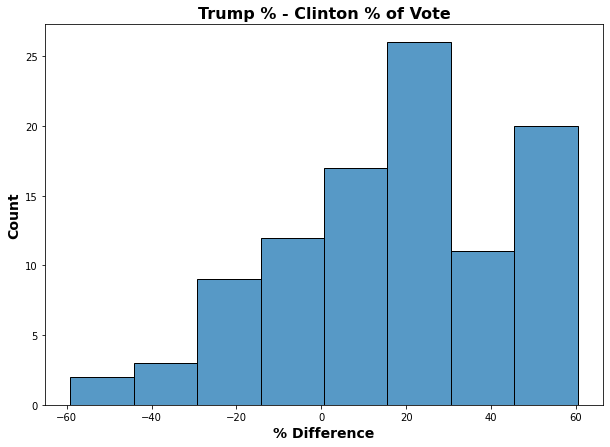

In [17]:
## Plot distribution of difference between vote earned by Trump and by Clinton
  ## in 2016 by county
plt.figure(figsize=(10,7))
ax = sns.histplot(county_per_TvC['diff'])
ax.set_title('Trump % - Clinton % of Vote', fontsize=16, weight='bold')
ax.set_xlabel('% Difference', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')

> Since Trump won NC in 2016, it makes sense that the majority of counties have a positive difference (meaning Trump received more of the votes in that county).

In [18]:
## Merge the diff column onto the full 2020 election df on county_id
elec_df = elec_df.merge(county_per_TvC.drop(columns=['Donald J. Trump',
                                             'Hillary Clinton']),
                        how='left', on='county_id')
elec_df.head()

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020 party_cd  \
0   AA56273            0           85.0  ABSENTEE BY MAIL    Early      UNA   
1  AA201627            0           42.0  ABSENTEE ONESTOP    Early      UNA   
2  AA216996            0           54.0  ABSENTEE ONESTOP    Early      REP   
3   AA98377            0           44.0  ABSENTEE ONESTOP    Early      UNA   
4   AA69747            0           75.0  ABSENTEE ONESTOP    Early      UNA   

  gender_code  birth_year  registr_dt race_code ethnic_code  zip_code  \
0           F        1935  1984-10-01         W          NL   27253.0   
1           F        1978  2018-02-23         W          UN   27302.0   
2           M        1966  2020-10-31         W          UN   27302.0   
3           F        1976  1996-03-26         W          UN   27215.0   
4           F        1945  1989-08-15         W          NL   27215.0   

                    res_street_address res_city_desc state_cd birth_state  \
0  4430 E GREENSBORO-CHAPEL HILL RD           GRAHAM       NC          NY   
1                     117 W CLAY ST           MEBANE       NC          DC   
2               3670  COVINGTON TRL           MEBANE       NC          AL   
3                    421  WHITT AVE       BURLINGTON       NC          NC   
4                    1013  EDITH ST       BURLINGTON       NC          VA   

  drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  cong_dist_abbrv  \
0           N              1.0            08N       08N             13.0   
1           Y              1.0            10N       10N             13.0   
2           N              1.0            103       103             13.0   
3           Y              1.0            03S       03S             13.0   
4           Y              1.0            124       124             13.0   

  super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
0               15A              15A             24.0            64.0   
1               15A              15A             24.0            63.0   
2               15A              15A             24.0            63.0   
3               15A              15A             24.0            64.0   
4               15A              15A             24.0            63.0   

  school_dist_abbrv  county_id       diff  
0               NaN          1  12.551003  
1               NaN          1  12.551003  
2               NaN          1  12.551003  
3               NaN          1  12.551003  
4               NaN          1  12.551003

In [19]:
## Create a new column that represents how the voters' party fared in their 
  ## county during the 2016 election if they aligned with one of the 2 major 
    ## parties when registering to vote
## Republicans get the unaltered diff because it was calculated as 
  ## % Trump vote - % Clinton vote, and Democrats get the opposite
elec_df['county_party_res_2016'] = np.where(elec_df['party_cd']=='REP', 
                                           elec_df['diff'], -elec_df['diff'])

## Use floor division to turn the difference into a bin that essentially 
  ## represents magnitude of difference 
    ## Adjust by 1 so that 1 represents REP win by margin of less 10% or less,
    ## 2 (or -2) represents between 10% and 20% margin, etc
elec_df['county_party_res_2016'] = (elec_df['county_party_res_2016']//10)
elec_df['county_party_res_2016'] = np.where(elec_df['county_party_res_2016']>0,
                                            elec_df['county_party_res_2016']+1,
                                            elec_df['county_party_res_2016']-1)

## If the voter chose not to align themselves with one of the 2 major parties,
  ## this will be reflected with a 0
elec_df.loc[elec_df['party_cd'].isin(['UNA',
                                      'LIB',
                                      'CST',
                                      'GRE']),
            'county_party_res_2016'] = 0

In [20]:
## Create an alternate form of the above variable that bins the difference
  ## into 1 (voter's party won county), -1 (voter's party lost county),
    ## or 0 (voter not aligned with either of the 2 major parties)
def bin_county_party_res(county_party_res):
    
    if county_party_res > 0:
        return 1
    
    elif county_party_res < 0: 
        return -1
    
    else:
        return county_party_res

In [21]:
elec_df['county_party_res_2016_tri'] = elec_df['county_party_res_2016'].apply(bin_county_party_res)

In [22]:
elec_df.head(10)

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020 party_cd  \
0   AA56273            0           85.0  ABSENTEE BY MAIL    Early      UNA   
1  AA201627            0           42.0  ABSENTEE ONESTOP    Early      UNA   
2  AA216996            0           54.0  ABSENTEE ONESTOP    Early      REP   
3   AA98377            0           44.0  ABSENTEE ONESTOP    Early      UNA   
4   AA69747            0           75.0  ABSENTEE ONESTOP    Early      UNA   
5  AA170513            0           72.0  ABSENTEE ONESTOP    Early      DEM   
6   BM49306            0           54.0  ABSENTEE ONESTOP    Early      DEM   
7   AA91549            0           44.0  ABSENTEE ONESTOP    Early      UNA   
8  AA125250            0           48.0  ABSENTEE BY MAIL    Early      UNA   
9  AA181361            0           45.0  ABSENTEE BY MAIL    Early      UNA   

  gender_code  birth_year  registr_dt race_code ethnic_code  zip_code  \
0           F        1935  1984-10-01         W          NL   27253.0   
1           F        1978  2018-02-23         W          UN   27302.0   
2           M        1966  2020-10-31         W          UN   27302.0   
3           F        1976  1996-03-26         W          UN   27215.0   
4           F        1945  1989-08-15         W          NL   27215.0   
5           M        1948  2012-03-07         W          UN   27253.0   
6           F        1966  2020-06-01         B          NL   27215.0   
7           M        1976  1994-10-10         W          UN   27215.0   
8           M        1972  2013-12-05         W          UN   27215.0   
9           F        1975  2013-12-05         W          HL   27215.0   

                    res_street_address res_city_desc state_cd birth_state  \
0  4430 E GREENSBORO-CHAPEL HILL RD           GRAHAM       NC          NY   
1                     117 W CLAY ST           MEBANE       NC          DC   
2               3670  COVINGTON TRL           MEBANE       NC          AL   
3                    421  WHITT AVE       BURLINGTON       NC          NC   
4                    1013  EDITH ST       BURLINGTON       NC          VA   
5             5608  OLD CHEROKEE LN           GRAHAM       NC          MA   
6             187  CAVALIER WAY   #104    BURLINGTON       NC          NC   
7                    421  WHITT AVE       BURLINGTON       NC          NC   
8                    1013  EDITH ST       BURLINGTON       NC          VA   
9                    1013  EDITH ST       BURLINGTON       NC         NaN   

  drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  cong_dist_abbrv  \
0           N              1.0            08N       08N             13.0   
1           Y              1.0            10N       10N             13.0   
2           N              1.0            103       103             13.0   
3           Y              1.0            03S       03S             13.0   
4           Y              1.0            124       124             13.0   
5           N              1.0            08N       08N             13.0   
6           Y              1.0            03S       03S             13.0   
7           Y              1.0            03S       03S             13.0   
8           Y              1.0            124       124             13.0   
9           N              1.0            124       124             13.0   

  super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
0               15A              15A             24.0            64.0   
1               15A              15A             24.0            63.0   
2               15A              15A             24.0            63.0   
3               15A              15A             24.0            64.0   
4               15A              15A             24.0            63.0   
5               15A              15A             24.0            64.0   
6               15A              15A             24.0            64.0   
7               15A              15A             24.0           

# SCRUB

In [23]:
## Check df metadata
elec_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7347946 entries, 0 to 7347945
Data columns (total 30 columns):
ncid                         7347946 non-null object
no_vote_his                  7347946 non-null int64
birth_age_adj                7347946 non-null float64
voting_method                5353091 non-null object
Gen_2020                     7347946 non-null object
party_cd                     7347946 non-null object
gender_code                  7347946 non-null object
birth_year                   7347946 non-null int64
registr_dt                   7347946 non-null object
race_code                    7347946 non-null object
ethnic_code                  7347946 non-null object
zip_code                     7347686 non-null float64
res_street_address           7347946 non-null object
res_city_desc                7347686 non-null object
state_cd                     7347686 non-null object
birth_state                  5933008 non-null object
drivers_lic                  7347946 no

> Columns with missing values:
* `voting_method`: missing values are all cases where the individual did not cast a vote in this election
* `zip_code`: missing where voter info is confidential
* `res_street_address`: has no null values, but 260 values are "CONFIDENTIAL", corresponding to the 260 null values for `zip_code`, `res_city_desc`, and `state_cd`
* `res_city_desc`: missing where voter info is confidential
* `state_cd`: missing where voter info is confidential
* `birth_state`: with so many values missing, probably want to make 'missing' its own category for this feature
* `precinct_abbrv`:
* `vtd_abbrv`:
* `cong_dist_abbrv`:
* `super_court_abbrv`:
* `judic_dist_abbrv`:
* `nc_senate_abbrv`:
* `nc_house_abbrv`:
* `school_dist_abbrv`:

> Column dtypes:
* `registr_dt`: recast as datetime
* `zip_code`: likely more useful to treat as a categorical variable rather than as numeric
* `drivers_lic`: change from Y or N to 1 or 0

In [24]:
## Fill null values in voting_method with 'No Vote'
elec_df['voting_method'].fillna(value='No Vote', inplace=True)

In [25]:
## Fill null values in birth_state with 'Missing'
elec_df['birth_state'].fillna(value='Missing', inplace=True)

In [26]:
## Change drivers_license to binary indicator
elec_df['drivers_lic_bin'] = np.where(elec_df['drivers_lic']=='Y', 1, 0)

In [27]:
## Recast zip_code as category
elec_df['zip_code'] = elec_df['zip_code'].astype('category')

In [28]:
## Recast registr_dt as datetime variable
elec_df['registr_dt'] = pd.to_datetime(elec_df['registr_dt'])

In [29]:
## Recheck elec_df metadata
elec_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7347946 entries, 0 to 7347945
Data columns (total 30 columns):
ncid                         7347946 non-null object
no_vote_his                  7347946 non-null int64
birth_age_adj                7347946 non-null float64
voting_method                7347946 non-null object
Gen_2020                     7347946 non-null object
party_cd                     7347946 non-null object
gender_code                  7347946 non-null object
birth_year                   7347946 non-null int64
registr_dt                   7347946 non-null datetime64[ns]
race_code                    7347946 non-null object
ethnic_code                  7347946 non-null object
zip_code                     7347686 non-null category
res_street_address           7347946 non-null object
res_city_desc                7347686 non-null object
state_cd                     7347686 non-null object
birth_state                  7347946 non-null object
drivers_lic                  7

In [30]:
## Check summary statistics of numerical columns
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(elec_df.describe())

no_vote_his  birth_age_adj  birth_year  drivers_lic  voted_county_id  \
count   7347946.00     7347946.00  7347946.00   7347946.00       5353091.00   
mean          0.13          48.65     1971.35         0.87            52.37   
std           0.33          18.74       18.74         0.34            27.67   
min           0.00          18.00     1753.00         0.00             1.00   
25%           0.00          32.00     1957.00         1.00            32.00   
50%           0.00          48.00     1972.00         1.00            53.00   
75%           0.00          63.00     1988.00         1.00            75.00   
max           1.00         267.00     2002.00         1.00           100.00   

       cong_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  county_id       diff  \
count       7346994.00       7346994.00      7346994.00 7347946.00 7347946.00   
mean              7.02            25.78           60.73      52.90       3.49   
std               3.72            14.26           34.42      27.46      29.73   
min               1.00             1.00            1.00       1.00     -59.16   
25%               4.00            14.00           31.00      32.00     -20.08   
50%               7.00            26.00           60.00      55.00       2.48   
75%              10.00            38.00           91.00      76.00      30.12   
max              13.00            50.00          120.00     100.00      60.38   

       county_party_res_2016  county_party_res_2016_tri  
count             7347946.00                 7347946.00  
mean                    0.27                       0.08  
std                     3.03                       0.81  
min                    -8.00                      -1.00  
25%                    -2.00                      -1.00  
50%                     0.00                       0.00  
75%                     3.00                       1.00  
max                     7.00                       1.00

> Most of these numerical variables appear to make sense. However, the oldest voter is recorded as being 267 years old. This is obviously incorrect, so this column will need to be investigated further and outliers/ obviously incorrect data fixed or dropped.

## Investigate and Drop Age Outliers

In [31]:
## A total of 1833 registered voters are over the age of 115, the age of the 
  ## oldest human alive in the US in 2020
elec_df.loc[elec_df['birth_age_adj']>115]

ncid  no_vote_his  birth_age_adj      voting_method  \
74502      AA64367            0          120.0          IN-PERSON   
111036      AB8706            1          120.0            No Vote   
115409      AB2684            0          120.0            No Vote   
118201      AB8204            1          120.0            No Vote   
125715      AB2994            1          120.0            No Vote   
127257      AB6855            1          120.0            No Vote   
132994     AB13864            1          120.0            No Vote   
157054      AD6866            1          117.0            No Vote   
200896     AG18244            0          119.0            No Vote   
202536     AG13113            0          119.0            No Vote   
205416      AG7871            0          119.0   ABSENTEE ONESTOP   
206546     AG16763            0          119.0   ABSENTEE ONESTOP   
212757     AG18624            0          119.0            No Vote   
214829      AG5702            0          119.0   ABSENTEE ONESTOP   
219149      AG8871            0          119.0  ABSENTEE CURBSIDE   
222978     AG11778            0          119.0          IN-PERSON   
223013     AG14826            0          119.0          IN-PERSON   
225263     AG14896            0          119.0            No Vote   
238676     AH15610            0          117.0            No Vote   
238683     AH15614            1          120.0            No Vote   
240072     AJ45180            0          120.0   ABSENTEE ONESTOP   
240316     AJ43642            1          120.0            No Vote   
250420     AJ43628            1          120.0            No Vote   
257019     AJ45179            1          120.0            No Vote   
286407     AK30264            0          120.0   ABSENTEE ONESTOP   
288701    AK143287            1          123.0            No Vote   
362854     AK56543            0          120.0            No Vote   
622456     AM24181            0          116.0            No Vote   
893807     AS28050            0          120.0   ABSENTEE ONESTOP   
1078369    AX71514            1          120.0            No Vote   
1100163     AY7390            0          120.0   ABSENTEE ONESTOP   
1307620    BE61842            1          120.0            No Vote   
1314258     BE3470            0          120.0  ABSENTEE CURBSIDE   
1315417     BE3776            0          120.0   ABSENTEE ONESTOP   
1319230    BE59365            0          120.0            No Vote   
1319268    BE61263            0          120.0            No Vote   
1321959    BE65398            0          120.0            No Vote   
1322548    BE17249            0          120.0   ABSENTEE ONESTOP   
1324185     BE5969            0          120.0            No Vote   
1324494     BE6057            0          120.0            No Vote   
1324915     BE6141            1          120.0            No Vote   
1325689     BE6249            0          120.0   ABSENTEE ONESTOP   
1326155    BE71767            0          120.0   ABSENTEE ONESTOP   
1328003    BE74615            0          120.0            No Vote   
1328092    BE69412            0          120.0            No Vote   
1328981     BE6899            0          120.0            No Vote   
1329476    BE67041            0          120.0          IN-PERSON   
1331325     BE7403            0          120.0            No Vote   
1332718    BE78104            0          120.0   ABSENTEE ONESTOP   
1337005    BE62285            0          120.0            No Vote   
...            ...          ...            ...                ...   
5530341    DN19689            0          120.0   ABSENTEE ONESTOP   
5530976   DN120919            0          120.0   ABSENTEE ONESTOP   
5531046    DN19863            1          120.0            No Vote   
5532669    DN20175            0          120.0            No Vote   
5534078    DN20477            0          120.0   ABSENTEE ONESTOP   
5536111    DN20829            0          120.0            No Vote   
5540112    D

In [32]:
## The majority of those recorded as over 115 (1047 of the 1833) did not cast
  ## a vote in the election
    ## Presumably those that did have had their age recorded incorrectly
elec_df.loc[elec_df['birth_age_adj']>115]['Gen_2020'].value_counts()

No Vote         1047
Early            631
Election Day     152
Other              3
Name: Gen_2020, dtype: int64

In [33]:
## Most of those that are listed as over 115 years of age are recorded as 
  ## born in 1900 (120 years of age), so this may have been a placeholder
elec_df.loc[elec_df['birth_age_adj']>115]['birth_age_adj'].value_counts()

120.0    1777
119.0      23
136.0       4
117.0       4
121.0       3
118.0       3
267.0       3
116.0       2
167.0       2
123.0       2
138.0       2
255.0       1
224.0       1
248.0       1
127.0       1
135.0       1
244.0       1
150.0       1
241.0       1
Name: birth_age_adj, dtype: int64

> The 1833 registered voters over the age of 115 will be dropped from the DataFrame since this information is obviously incorrect (the oldest human alive in the United States as of 2020 is 115 years old).

In [34]:
## Drop all records with birth_age_adj greater than 115
over_115 = elec_df.loc[elec_df['birth_age_adj']>115]
elec_df.drop(index=over_115.index, inplace=True)

In [35]:
## Check summary statistics of categorical columns
elec_df.describe(include=['O'])

ncid     voting_method Gen_2020 party_cd gender_code race_code  \
count   7346113           7346113  7346113  7346113     7346113   7346113   
unique  7346113                 8        4        6           4         9   
top     EP38964  ABSENTEE ONESTOP    Early      DEM           F         W   
freq          1           3342998  4485152  2615304     3643128   4686250   

       ethnic_code                  res_street_address res_city_desc state_cd  \
count      7346113                             7346113       7345854  7345854   
unique           3                             3712431           764        3   
top             NL  1  DUKE UNIVERSITY WEST CAMPUS         CHARLOTTE       NC   
freq       5199824                                3849        670281  7345836   

       birth_state precinct_abbrv vtd_abbrv super_court_abbrv  \
count      7346113        7345164   7345164           7345164   
unique          59           1892      1805                73   
top             NC             02        04                28   
freq       2890302          57378     75997            207133   

       judic_dist_abbrv school_dist_abbrv  
count           7345164           5803942  
unique               48               149  
top                  26                 2  
freq             791501            553688

## Investigate Missing Values

In [36]:
## Check number of null values for zip_code
elec_df['zip_code'].isna().sum()

259

In [37]:
## Check the 259 records with missing zip_code
elec_df.loc[elec_df['zip_code'].isna()]

ncid  no_vote_his  birth_age_adj      voting_method  \
8254       AA50616            0           55.0          IN-PERSON   
36754      AP84914            0           30.0   ABSENTEE ONESTOP   
56866     AA192589            0           30.0            No Vote   
95641     DE225925            0           33.0   ABSENTEE ONESTOP   
139484     AC14362            0           71.0            No Vote   
142348     AC14704            0           80.0            No Vote   
285329    AK171004            0           51.0   ABSENTEE ONESTOP   
286643    DB221759            0           60.0            No Vote   
317343    DB277475            0           29.0   ABSENTEE ONESTOP   
332450    DT108296            0           58.0   ABSENTEE BY MAIL   
376725    AL335425            0           74.0            No Vote   
377920    AL328641            0           39.0   ABSENTEE ONESTOP   
401767    AL305747            0           43.0   ABSENTEE ONESTOP   
401768    AL305712            0           83.0   ABSENTEE ONESTOP   
411228    AL355445            1           21.0            No Vote   
411254    DE246981            0           34.0   ABSENTEE ONESTOP   
422207    AL106742            0           54.0   ABSENTEE ONESTOP   
432291    AL363310            0           53.0   ABSENTEE ONESTOP   
441964    AL237722            0           57.0            No Vote   
443383    AL355435            0           41.0          IN-PERSON   
450940    AL285235            0           43.0   ABSENTEE ONESTOP   
476789    AL334770            0           32.0   ABSENTEE ONESTOP   
647530    AN139591            0           43.0   ABSENTEE ONESTOP   
647531    CW461709            0           44.0   ABSENTEE ONESTOP   
683016    AN193351            0           48.0            No Vote   
705533    AN162023            0           45.0            No Vote   
736918    BN383787            0           51.0   ABSENTEE ONESTOP   
748071    AN199292            0           26.0   ABSENTEE ONESTOP   
748072    AN184983            0           28.0          IN-PERSON   
748074    AN215145            0           20.0   ABSENTEE ONESTOP   
768049    AN177877            0           46.0   ABSENTEE ONESTOP   
768075    AN144380            0           49.0   ABSENTEE ONESTOP   
779064     AN69938            0           47.0            No Vote   
779065     AN69917            0           51.0          IN-PERSON   
898213      AS8228            0           63.0   ABSENTEE ONESTOP   
950091    BN243653            0           53.0            No Vote   
1058611   EH630456            0           44.0   ABSENTEE ONESTOP   
1060297     AX7354            0           89.0  ABSENTEE CURBSIDE   
1067124    EL80043            0           30.0   ABSENTEE ONESTOP   
1071654   DE275058            0           26.0   ABSENTEE ONESTOP   
1165022   BB116414            1           20.0            No Vote   
1187341   BB107155            0           54.0   ABSENTEE ONESTOP   
1270253   BD144421            1           29.0            No Vote   
1509198    DY32803            0           31.0   ABSENTEE ONESTOP   
1534400    BF25400            0           48.0   ABSENTEE ONESTOP   
1676401   BH104861            0           47.0           CURBSIDE   
1691551   BH178824            0           21.0          IN-PERSON   
1692795   BH187312            1           43.0            No Vote   
1703680    BJ38272            0           26.0            No Vote   
1722400    BJ34935            0           39.0            No Vote   
...            ...          ...            ...                ...   
6428116  EH1319262            0           35.0        PROVISIONAL   
6431683   EH535206            0           44.0   ABSENTEE ONESTOP   
6432482  EH1115010            0           27.0          IN-PERSON   
6433711  EH1102525            0           40.0            No Vote   
6447439   EH896398            0           43.0            No Vote   
6457149   EH317346            0           45.0   ABSENTEE ONESTOP   
6482363   EH

> The records missing `zip_code` also correspond to the records missing `res_city_desc` and `state_cd`, most likely because the residential address is confidential for these individuals. There are so many cities (765) and zipcodes (843) represented in this dataset that these two variables may not be all that useful as predictors and may lead to overfitting. These seems especially likely given that some cities/ zip codes only appear for a handful of records. The county in which the voter is registered may serve as a better predictor representing geographic location since there are only 100 counties. This variable is also not missing any values.

In [38]:
## Check number of null values for precinct_abbrv
elec_df['precinct_abbrv'].isna().sum()

949

In [39]:
## Check the 949 records with missing precinct_abbrv
missing_precinct_info = elec_df.loc[elec_df['precinct_abbrv'].isna()]
missing_precinct_info

ncid  no_vote_his  birth_age_adj voting_method Gen_2020 party_cd  \
34725    DE278765            0           58.0       No Vote  No Vote      DEM   
180385    AF25244            0           32.0       No Vote  No Vote      UNA   
187558    AF25346            1           35.0       No Vote  No Vote      UNA   
190788     AF6115            0           44.0   PROVISIONAL    Other      REP   
228017     AH4335            1           58.0       No Vote  No Vote      DEM   
228880     AH5323            1           48.0       No Vote  No Vote      DEM   
231359     AH7861            1          102.0       No Vote  No Vote      DEM   
231905     AH8499            1           51.0       No Vote  No Vote      DEM   
231992     AH8605            1           46.0       No Vote  No Vote      REP   
232153     AH8781            1           42.0       No Vote  No Vote      DEM   
234403    AH11059            1           57.0       No Vote  No Vote      DEM   
234479    AH11168            1           62.0       No Vote  No Vote      DEM   
235906    AH12644            1           73.0       No Vote  No Vote      DEM   
236684    AH13440            1           54.0       No Vote  No Vote      DEM   
236733    AH13522            1           93.0       No Vote  No Vote      DEM   
236761    AH13541            1           51.0       No Vote  No Vote      DEM   
238016    AH14882            1           46.0       No Vote  No Vote      REP   
238121    AH14992            1           77.0       No Vote  No Vote      DEM   
238491    AH15413            1          104.0       No Vote  No Vote      DEM   
238820    AH15740            1           64.0       No Vote  No Vote      DEM   
256366    AJ43397            0           49.0       No Vote  No Vote      UNA   
377155   EF131243            0           32.0       No Vote  No Vote      REP   
377972   AL303312            1           54.0       No Vote  No Vote      DEM   
380226   AL235490            1           34.0       No Vote  No Vote      DEM   
382060   AL228883            0           61.0       No Vote  No Vote      DEM   
384972   AL289848            1           24.0       No Vote  No Vote      UNA   
385034   AL270143            0           26.0       No Vote  No Vote      UNA   
385306   AL276374            1           26.0       No Vote  No Vote      REP   
386662   AL269450            0           27.0       No Vote  No Vote      DEM   
386742   AL232422            0           44.0       No Vote  No Vote      DEM   
387036   AL183109            0           37.0       No Vote  No Vote      UNA   
387116   AL242543            1           40.0       No Vote  No Vote      UNA   
389022   AL319300            1           29.0       No Vote  No Vote      UNA   
389810   AL169076            0           40.0       No Vote  No Vote      DEM   
390403   AL209046            0           44.0       No Vote  No Vote      UNA   
390612   AL125509            0           63.0       No Vote  No Vote      UNA   
390718   AL251867            0           30.0       No Vote  No Vote      UNA   
390817   AL283368            1           64.0       No Vote  No Vote      UNA   
392800    AL39188            0           62.0       No Vote  No Vote      REP   
396479   AL301368            1           23.0       No Vote  No Vote      DEM   
398066     AL5221            0           88.0       No Vote  No Vote      DEM   
400573   AL170179            0           57.0       No Vote  No Vote      UNA   
401431   AL272599            0           28.0       No Vote  No Vote      DEM   
403874   AL302809            0           48.0       No Vote  No Vote      DEM   
406120   AL212304            0           31.0       No Vote  No Vote      DEM   
407214   AL278031            1           90.0       No Vote  No Vote      DEM   
407386   AL153014            1           53.0       No Vote  No Vote      UNA   
407410   AL294492            0           51.0       No Vote  No Vote      UNA   
410835   AL163181            0           48.

In [40]:
## Check what other district info is missing for records missing precinct
pct_dist_info = ['precinct_abbrv', 'vtd_abbrv', 'cong_dist_abbrv',
                 'super_court_abbrv', 'judic_dist_abbrv', 'nc_senate_abbrv',
                 'nc_house_abbrv', 'school_dist_abbrv']

for col in pct_dist_info:
    print('***** {} *****'.format(col))
    print('Total null values in column: {}'.format(missing_precinct_info[col].isna().sum()))
    print('---'*5)
    print()

# Every record with a null value for precinct is also missing all other
  # district info

***** precinct_abbrv *****
Total null values in column: 949
---------------

***** vtd_abbrv *****
Total null values in column: 949
---------------

***** cong_dist_abbrv *****
Total null values in column: 949
---------------

***** super_court_abbrv *****
Total null values in column: 949
---------------

***** judic_dist_abbrv *****
Total null values in column: 949
---------------

***** nc_senate_abbrv *****
Total null values in column: 949
---------------

***** nc_house_abbrv *****
Total null values in column: 949
---------------

***** school_dist_abbrv *****
Total null values in column: 949
---------------



In [41]:
check_unique('voting_method', missing_precinct_info)

count      %
No Vote             932  98.21
PROVISIONAL           8   0.84
ABSENTEE ONESTOP      5   0.53
ABSENTEE BY MAIL      2   0.21
IN-PERSON             1   0.11
CURBSIDE              1   0.11

In [42]:
check_unique('no_vote_his', missing_precinct_info)

count     %
1    539  56.8
0    410  43.2

In [43]:
check_unique('county_id', missing_precinct_info)

count      %
60    192  20.23
50    185  19.49
11    184  19.39
26     62   6.53
78     43   4.53
74     40   4.21
32     35   3.69
71     34   3.58
68     31   3.27
8      16   1.69
41     13   1.37
14     11   1.16
67     10   1.05
13     10   1.05
76      9   0.95
25      8   0.84
51      7   0.74
72      6   0.63
77      6   0.63
69      5   0.53
62      4   0.42
22      3   0.32
6       3   0.32
59      3   0.32
42      2   0.21
24      2   0.21
12      2   0.21
99      2   0.21
79      2   0.21
95      2   0.21
54      2   0.21
65      2   0.21
46      1   0.11
87      1   0.11
9       1   0.11
86      1   0.11
81      1   0.11
19      1   0.11
75      1   0.11
39      1   0.11
66      1   0.11
63      1   0.11
98      1   0.11
34      1   0.11
1       1   0.11

In [44]:
## All records missing the voted_county_id are individuals who did not 
  ## cast a vote in this election
elec_df.loc[elec_df['voted_county_id'].isna()]['Gen_2020'].value_counts()

No Vote    1993808
Name: Gen_2020, dtype: int64

In [45]:
elec_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7346113 entries, 0 to 7347945
Data columns (total 30 columns):
ncid                         7346113 non-null object
no_vote_his                  7346113 non-null int64
birth_age_adj                7346113 non-null float64
voting_method                7346113 non-null object
Gen_2020                     7346113 non-null object
party_cd                     7346113 non-null object
gender_code                  7346113 non-null object
birth_year                   7346113 non-null int64
registr_dt                   7346113 non-null datetime64[ns]
race_code                    7346113 non-null object
ethnic_code                  7346113 non-null object
zip_code                     7345854 non-null category
res_street_address           7346113 non-null object
res_city_desc                7345854 non-null object
state_cd                     7345854 non-null object
birth_state                  7346113 non-null object
drivers_lic                  7

> As shown above, the only columns currently missing information are those related to location. The county in which a person registered to vote (`county_id`) will be used as a predictor for modeling. The other location info can be used for visualizing trends, but they won't be used for modeling purposes due to missing info, as well as high cardinality and prevalence of many rare labels (see section below).

# EXPLORE

## Categorical Variables

In [46]:
check_unique('voting_method', elec_df)

count      %
ABSENTEE ONESTOP   3342998  45.51
No Vote            1993808  27.14
ABSENTEE BY MAIL    983274  13.38
IN-PERSON           829922  11.30
ABSENTEE CURBSIDE   158880   2.16
PROVISIONAL          14557   0.20
CURBSIDE             13799   0.19
TRANSFER              8875   0.12

In [47]:
check_unique('Gen_2020', elec_df)

count      %
Early         4485152  61.05
No Vote       1993808  27.14
Election Day   843721  11.49
Other           23432   0.32

> The 'Other' category is made up of only 23,432 individuals (<0.5%) that voted with either a provisional or transfer ballot. Need to consider dropping this extremely rare category or somehow adding those records into one of the other categories for purposes of modeling.

In [48]:
check_unique('party_cd', elec_df)

count      %
DEM  2615304  35.60
UNA  2445413  33.29
REP  2230466  30.36
LIB    46489   0.63
CST     4738   0.06
GRE     3703   0.05

> LIB, CST, and GRE extremely rare within the state. Need to deal with this in some way, but grouping into a single 'Rare' category won't necessarily solve the issue since that would still represent barely more than 0.5% of voters in this election. It could make sense to combine these three parties with UNA (unaffiliated) to simply represent voters that do not align with one of the two major parties.

In [49]:
check_unique('gender_code', elec_df)

count      %
F  3643128  49.59
M  3096471  42.15
U   606508   8.26
         6   0.00

In [50]:
## Inspect records where gender_code is encoded as whitespace
elec_df.loc[elec_df['gender_code']==' ']

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020  \
143538    AD16896            0           55.0  ABSENTEE ONESTOP    Early   
146513   CW730457            0           41.0  ABSENTEE ONESTOP    Early   
151670    AD31495            0           33.0  ABSENTEE ONESTOP    Early   
1209536   BC35157            0           62.0           No Vote  No Vote   
2342599   BP59036            0           28.0  ABSENTEE ONESTOP    Early   
7345546   ES24715            0           82.0  ABSENTEE ONESTOP    Early   

        party_cd gender_code  birth_year registr_dt race_code ethnic_code  \
143538       UNA                    1965 1997-08-15         W          NL   
146513       DEM                    1979 2020-02-04         W          UN   
151670       DEM                    1987 2008-11-04         B          UN   
1209536      REP                    1958 1996-05-30         B          NL   
2342599      REP                    1992 2020-10-08         U          UN   
7345546      REP                    1938 2020-10-30         U          UN   

        zip_code             res_street_address res_city_desc state_cd  \
143538   28170.0            247  HIGHLAND DR        WADESBORO       NC   
146513   28170.0         211 S RUTHERFORD ST        WADESBORO       NC   
151670   28119.0               7355  NC 145            MORVEN       NC   
1209536  28431.0  5264  ANDREW JACKSON HWY SW       CHADBOURN       NC   
2342599  27525.0              50  CATLETT LN      FRANKLINTON       NC   
7345546  28714.0       1156  GEORGES FORK RD       BURNSVILLE       NC   

        birth_state  drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  \
143538           NC            1              4.0          WADES        W3   
146513      Missing            1              4.0          WADES        W2   
151670      Missing            1              4.0             MM        MM   
1209536          NC            1              NaN            P06       P06   
2342599     Missing            1             35.0             14        14   
7345546          NC            0            100.0         01 BUR    01-BUR   

         cong_dist_abbrv super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  \
143538               9.0               16A              16A             25.0   
146513               9.0               16A              16A             25.0   
151670               9.0               16A              16A             25.0   
1209536              7.0               13A               13             13.0   
2342599              4.0                09               09             18.0   
7345546             11.0                24               24             47.0   

         nc_house_abbrv school_dist_abbrv  county_id       diff  \
143538             55.0              SCH5          4 -12.912970   
146513             55.0              SCH6          4 -12.912970   
151670             55.0              SCH3          4 -12.912970   
1209536            46.0                CO         24  21.867260   
2342599             7.0              SBO5         35  11.429506   
7345546           118.0               NaN        100  31.323053   

         county_party_res_2016  county_party_res_2016_tri  
143538                     0.0                        0.0  
146513                     2.0                        1.0  
151670                     2.0                        1.0  
1209536                    3.0                        1.0  
2342599                    2.0                        1.0  
7345546                    4.0                        1.0

In [51]:
## For the 6 individuals whose gender is encoded as whitespace, replace with
  ## 'U' for undesignated
elec_df.loc[elec_df['gender_code']==' ', 'gender_code']='U'
check_unique('gender_code', elec_df)

count      %
F  3643128  49.59
M  3096471  42.15
U   606514   8.26

In [52]:
check_unique('race_code', elec_df)

count      %
W  4686250  63.79
B  1511748  20.58
U   742414  10.11
O   198460   2.70
A   104311   1.42
I    55642   0.76
M    46897   0.64
P      389   0.01
         2   0.00

In [53]:
## Inspect records where race_code is encoded as whitespace
elec_df.loc[elec_df['race_code']==' ']

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020  \
3250136   CE7034            0           56.0  ABSENTEE ONESTOP    Early   
5275378  DG12086            0           54.0  ABSENTEE ONESTOP    Early   

        party_cd gender_code  birth_year registr_dt race_code ethnic_code  \
3250136      UNA           M        1964 1986-04-23                    NL   
5275378      REP           F        1966 2006-11-07                    UN   

        zip_code  res_street_address res_city_desc state_cd birth_state  \
3250136  28376.0   136  LEBEAU DR          RAEFORD       NC          NC   
5275378  27944.0  140  PATRICK DR         HERTFORD       NC          NC   

         drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  \
3250136            1             47.0            06B        06   
5275378            1             72.0         NEW HO    NEW-HO   

         cong_dist_abbrv super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  \
3250136              9.0               19D              19D             21.0   
5275378              3.0                01               01              1.0   

         nc_house_abbrv school_dist_abbrv  county_id       diff  \
3250136            48.0               NaN         47 -10.739648   
5275378             1.0               NaN         72  27.579041   

         county_party_res_2016  county_party_res_2016_tri  
3250136                    0.0                        0.0  
5275378                    3.0                        1.0

In [54]:
## For the 2 individuals whose race is encoded as whitespace, replace with
  ## 'U' for undesignated
elec_df.loc[elec_df['race_code']==' ', 'race_code']='U'
check_unique('race_code', elec_df)

count      %
W  4686250  63.79
B  1511748  20.58
U   742416  10.11
O   198460   2.70
A   104311   1.42
I    55642   0.76
M    46897   0.64
P      389   0.01

> The most infrequent categories (Other, Asian, Native American, Multiple, Pacific Islander/Native Hawaiian) each represent less than 5% of voters. To deal with these rare labels, it is probably best from a modeling standpoint to group them all under 'Other'.

In [55]:
check_unique('ethnic_code', elec_df)

count      %
NL  5199824  70.78
UN  1919015  26.12
HL   227274   3.09

> Voters that chose to identify themselves as Hispanic or Latino represent less than 5% of voters. Check below to see how disclosed racial and ethnic identities intersect.

In [56]:
## Investigate how race intersects with ethnic code
for code in elec_df['ethnic_code'].unique():
    print('*****{}*****'.format(code))
    display(elec_df.loc[elec_df['ethnic_code']==code]['race_code'].value_counts().to_frame())
    print()

*****NL*****


race_code
W    3834402
B    1121721
O      82871
A      69917
I      46207
U      22708
M      21803
P        195


*****UN*****


race_code
W     797565
U     657553
B     382302
A      33485
O      25885
M      13531
I       8539
P        155


*****HL*****


race_code
O      89704
U      62155
W      54283
M      11563
B       7725
A        909
I        896
P         39

> Patterns of intersection between race and ethnicity are somewhat unclear. The majority of voters that chose not to disclose their race (U) also chose not to disclose their ethnicity (UN) (657,553 out of 742,416). The majority of voters that identified themselves as Hispanic or Latino when registering listed their race as 'Other'(89,704 out of 227,274) or 'Undesignated' (62,155 out of 227,274), then 'White' (54,283 out of 227,274). As such, I am uncertain how useful this feature will be as a predictor, especially given that the 'HL' category is so rare.

In [57]:
check_unique('zip_code', elec_df)

count     %
28269.0  57914  0.79
27587.0  56290  0.77
28277.0  54539  0.74
28078.0  49949  0.68
27610.0  49660  0.68
28027.0  49364  0.67
28173.0  47648  0.65
27410.0  43658  0.59
27406.0  43486  0.59
27713.0  43356  0.59
27703.0  42677  0.58
28216.0  42371  0.58
28215.0  41318  0.56
27284.0  41243  0.56
27526.0  40835  0.56
27858.0  40831  0.56
27519.0  40085  0.55
28227.0  39547  0.54
27707.0  38507  0.52
27603.0  38483  0.52
28314.0  38335  0.52
28025.0  38196  0.52
27529.0  37881  0.52
27834.0  37843  0.52
27265.0  37021  0.50
27705.0  36954  0.50
27616.0  36868  0.50
28601.0  36251  0.49
27613.0  36120  0.49
28117.0  35506  0.48
28205.0  35491  0.48
27106.0  35263  0.48
27516.0  35194  0.48
27513.0  34917  0.48
28110.0  34758  0.47
27615.0  34691  0.47
28655.0  34175  0.47
28210.0  34140  0.46
28412.0  33466  0.46
27405.0  33280  0.45
28806.0  32948  0.45
27407.0  32656  0.44
28540.0  32290  0.44
28105.0  32244  0.44
27520.0  32104  0.44
27606.0  31957  0.44
28226.0  31875  0.43
27502.0  31611  0.43
27612.0  30935  0.42
27107.0  30853  0.42
...        ...   ...
28552.0     95  0.00
28537.0     95  0.00
28375.0     87  0.00
27827.0     82  0.00
28749.0     80  0.00
28589.0     78  0.00
28629.0     77  0.00
27985.0     72  0.00
28136.0     66  0.00
28575.0     63  0.00
28733.0     58  0.00
28076.0     56  0.00
27256.0     52  0.00
27881.0     43  0.00
28662.0     41  0.00
27841.0     39  0.00
27867.0     34  0.00
28308.0     34  0.00
28672.0     32  0.00
28102.0     30  0.00
27213.0     28  0.00
37821.0     27  0.00
28647.0     27  0.00
28652.0     22  0.00
27969.0     21  0.00
27887.0     20  0.00
28737.0     17  0.00
28661.0     16  0.00
28664.0     15  0.00
28653.0     14  0.00
30546.0     12  0.00
28024.0     10  0.00
28424.0      9  0.00
28362.0      9  0.00
28750.0      7  0.00
28770.0      7  0.00
27838.0      7  0.00
27802.0      7  0.00
27259.0      6  0.00
27833.0      6  0.00
27835.0      6  0.00
28038.0      5  0.00
28666.0      4  0.00
28378.0      4  0.00
24148.0      4  0.00
28765.0      3  0.00
27593.0      2  0.00
23917.0      2  0.00
28019.0      1  0.00
27836.0      1  0.00

[843 rows x 2 columns]

> There are 843 different zip codes and many of them are only represented by a few records.

In [58]:
check_unique('res_city_desc', elec_df)

count     %
CHARLOTTE           670281  9.12
RALEIGH             402033  5.47
GREENSBORO          240144  3.27
DURHAM              229940  3.13
WINSTON SALEM       176871  2.41
FAYETTEVILLE        172437  2.35
WILMINGTON          161867  2.20
CARY                116684  1.59
ASHEVILLE           108396  1.48
CONCORD              87560  1.19
CHAPEL HILL          83061  1.13
GREENVILLE           78687  1.07
HIGH POINT           71719  0.98
GASTONIA             71536  0.97
MOORESVILLE          65356  0.89
JACKSONVILLE         62981  0.86
APEX                 61575  0.84
MATTHEWS             58484  0.80
WAKE FOREST          56290  0.77
HICKORY              55784  0.76
HENDERSONVILLE       53952  0.73
CLAYTON              53288  0.73
LEXINGTON            52874  0.72
SALISBURY            52822  0.72
MONROE               52813  0.72
BURLINGTON           52604  0.72
NEW BERN             51469  0.70
ROCKY MOUNT          50778  0.69
STATESVILLE          50008  0.68
HUNTERSVILLE         49949  0.68
WAXHAW               47648  0.65
GOLDSBORO            46891  0.64
SANFORD              46208  0.63
WILSON               41963  0.57
KERNERSVILLE         41243  0.56
GARNER               37881  0.52
SHELBY               36692  0.50
KANNAPOLIS           34777  0.47
ASHEBORO             34266  0.47
MORGANTON            34175  0.47
FUQUAY VARINA        34062  0.46
LELAND               30773  0.42
LENOIR               30625  0.42
HOLLY SPRINGS        30485  0.41
LUMBERTON            30203  0.41
THOMASVILLE          29824  0.41
BOONE                29423  0.40
ELIZABETH CITY       28804  0.39
INDIAN TRAIL         28227  0.38
RAEFORD              27766  0.38
...                    ...   ...
LAUREL HILL             92  0.00
LASKER                  88  0.00
PROCTORVILLE            87  0.00
FALKLAND                82  0.00
LITTLE SWITZERLAND      80  0.00
EAST LAKE               79  0.00
GLENDALE SPRINGS        77  0.00
WINFALL                 72  0.00
POLKVILLE               66  0.00
FONTANA DAM             58  0.00
LAKE SANTEELAH          56  0.00
HENRIETTA               56  0.00
GULF                    52  0.00
CONNELLYS SPRINGS       45  0.00
SPEED                   43  0.00
STONEY CREEK            43  0.00
PINEOLA                 41  0.00
HASSELL                 39  0.00
POPE AFB                34  0.00
POTECASI                34  0.00
SCOTTVILLE              32  0.00
MCFARLAN                30  0.00
BONLEE                  28  0.00
LINVILLE FALLS          27  0.00
BIG CREEK AREA          27  0.00
MINNEAPOLIS             22  0.00
RODUCO                  21  0.00
TILLERY                 20  0.00
GLENDON                 20  0.00
PATTERSON               16  0.00
PLUMTREE                15  0.00
MCDONALD                15  0.00
MONTEZUMA               14  0.00
HIAWASSEE               12  0.00
CLIFFSIDE               10  0.00
MARIETTA                 9  0.00
BRUNSWICK                9  0.00
GUMBERRY                 7  0.00
RIDGECREST               7  0.00
LYNN                     7  0.00
HIGH FALLS               6  0.00
EARL                     5  0.00
REX                      4  0.00
ICARD                    4  0.00
RIDGEWAY                 4  0.00
PENLAND                  3  0.00
BOYDTON                  2  0.00
LEWISTON                 2  0.00
WILSONS MILLS            2  0.00
CAROLEEN                 1  0.00

[765 rows x 2 columns]

> There are 765 different cities represented for the whole state.

In [59]:
elec_df['county_id'].nunique()

100

In [60]:
check_unique('county_id', elec_df)

count      %
92   792569  10.79
60   791693  10.78
41   383763   5.22
34   271877   3.70
32   243683   3.32
26   226219   3.08
11   207317   2.82
65   177364   2.41
90   168282   2.29
36   151774   2.07
13   150270   2.05
51   143552   1.95
49   130571   1.78
74   122847   1.67
67   117130   1.59
10   114705   1.56
29   113577   1.55
68   111457   1.52
1    110641   1.51
18   108514   1.48
80    97384   1.33
76    94464   1.29
45    87366   1.19
43    82226   1.12
96    76039   1.04
78    75379   1.03
63    73917   1.01
25    72910   0.99
64    68325   0.93
23    67632   0.92
55    62243   0.85
79    61218   0.83
12    58290   0.79
19    57991   0.79
98    56443   0.77
14    54650   0.74
16    52285   0.71
35    47592   0.65
86    47134   0.64
44    46457   0.63
81    45936   0.63
71    44982   0.61
95    44792   0.61
97    43816   0.60
84    42917   0.58
39    40128   0.55
53    38593   0.53
54    38422   0.52
82    38016   0.52
42    36975   0.50
24    36218   0.49
33    35598   0.48
7     33994   0.46
47    33179   0.45
85    31978   0.44
30    31412   0.43
31    30907   0.42
28    30169   0.41
59    29843   0.41
50    29745   0.40
91    29554   0.40
77    29351   0.40
70    28741   0.39
73    27746   0.38
56    27223   0.37
88    26526   0.36
2     24914   0.34
99    24671   0.34
20    22632   0.31
83    22056   0.30
27    21829   0.30
9     21292   0.29
5     19544   0.27
57    17260   0.23
62    17048   0.23
4     16708   0.23
58    16509   0.22
75    16475   0.22
17    15504   0.21
46    14986   0.20
100   14177   0.19
66    13879   0.19
93    13479   0.18
8     13287   0.18
6     12399   0.17
40    11331   0.15
61    11153   0.15
21    10323   0.14
87    10117   0.14
69     9754   0.13
72     9713   0.13
22     9126   0.12
37     8337   0.11
94     8318   0.11
15     8156   0.11
3      7603   0.10
52     7374   0.10
38     6094   0.08
48     3159   0.04
89     2395   0.03

In [61]:
check_unique('state_cd', elec_df)

count      %
NC   7345836  100.0
NaN      259    0.0
GA        12    0.0
VA         6    0.0

In [62]:
## Inspect the 18 records (12 from GA, 6 from VA) where the voter's
  ## residential state_cd is outside NC
elec_df.loc[elec_df['state_cd'].isin(['GA', 'VA'])]

ncid  no_vote_his  birth_age_adj     voting_method      Gen_2020  \
1124594   BA15985            0           68.0  ABSENTEE ONESTOP         Early   
1124595   BA19020            0           38.0  ABSENTEE ONESTOP         Early   
1126277    BA5483            0           62.0           No Vote       No Vote   
1126961   BA19429            0           19.0         IN-PERSON  Election Day   
1126975    BA6026            0           75.0           No Vote       No Vote   
1126996    BA6053            0           47.0  ABSENTEE ONESTOP         Early   
1126997    BA3428            0           47.0  ABSENTEE ONESTOP         Early   
1127006   BA19892            0           22.0  ABSENTEE ONESTOP         Early   
1127650    BA6548            0           51.0         IN-PERSON  Election Day   
1127657   BA14352            0           47.0         IN-PERSON  Election Day   
1127675    BA6576            0           73.0           No Vote       No Vote   
1129679   CB13409            0           73.0  ABSENTEE ONESTOP         Early   
5672141  DS118823            1           79.0           No Vote       No Vote   
5679863   DS76068            0           78.0           No Vote       No Vote   
5707566   DS47767            0           59.0           No Vote       No Vote   
5707568   DS27729            0           56.0           No Vote       No Vote   
7076722   EJ20356            0           72.0  ABSENTEE ONESTOP         Early   
7076723   EJ20355            0           71.0  ABSENTEE ONESTOP         Early   

        party_cd gender_code  birth_year registr_dt race_code ethnic_code  \
1124594      DEM           F        1952 2012-09-24         W          NL   
1124595      DEM           F        1982 2019-06-18         W          NL   
1126277      REP           M        1958 1990-10-08         W          NL   
1126961      REP           M        2001 2020-02-05         W          UN   
1126975      REP           M        1945 1986-08-25         W          NL   
1126996      REP           M        1973 1992-03-27         W          NL   
1126997      REP           F        1973 1992-04-03         W          NL   
1127006      DEM           U        1998 2020-10-09         U          UN   
1127650      REP           M        1969 2014-06-09         W          UN   
1127657      UNA           F        1973 2008-10-29         W          NL   
1127675      REP           F        1947 1979-01-04         W          NL   
1129679      DEM           F        1947 2013-05-22         W          NL   
5672141      REP           M        1941 2018-10-21         W          UN   
5679863      UNA           F        1942 2000-10-09         W          NL   
5707566      REP           M        1961 1992-09-23         W          NL   
5707568      REP           F        1964 1984-09-18         W          NL   
7076722      UNA           M        1948 2004-07-15         W          UN   
7076723      UNA           F        1949 2004-07-15         W          UN   

        zip_code           res_street_address res_city_desc state_cd  \
1124594  30546.0             391  KOLBY LN        HIAWASSEE       GA   
1124595  30546.0             391  KOLBY LN        HIAWASSEE       GA   
1126277  30546.0        3035  ELLINGTON RD        HIAWASSEE       GA   
1126961  30546.0  693  UPPER BELL CREEK RD        HIAWASSEE       GA   
1126975  30546.0  927  UPPER BELL CREEK RD        HIAWASSEE       GA   
1126996  30546.0  693  UPPER BELL CREEK RD        HIAWASSEE       GA   
1126997  30546.0  693  UPPER BELL CREEK RD        HIAWASSEE       GA   
1127006  30546.0  693  UPPER BELL CREEK RD        HIAWASSEE       GA   
1127650  30546.0  207  UPPER BELL CREEK RD        HIAWASSEE       GA   
1127657  30546.0  207  UPPER BELL CREEK RD        HIAWASSEE       GA   
1127675  30546.0    3  UPPER BELL CREEK RD        HIAWASSEE       GA   
1129679  30546.0            216  JUSTUS RD        HIAWASSEE       GA   
5672141  24148.0            372  POWELL RD         RIDGEWAY       VA   
5

> The 18 records above represent individuals that live in either GA or VA, very close to the NC border. The `county_id` under which their voter registrations are listed are the nearest NC county to the `res_city_desc` provided as part of their residential address. How are several of these voters casting votes in NC?? They likely ought to be removed from analysis.

In [63]:
## Drop voters whose registration lists them as living in GA or VA
elec_df.drop(index=elec_df.loc[elec_df['state_cd'].isin(['GA', 'VA'])].index, inplace=True)
check_unique('state_cd', elec_df)

count      %
NC   7345836  100.0
NaN      259    0.0

In [64]:
elec_df['birth_state'].nunique()

59

In [65]:
check_unique('birth_state', elec_df)

count      %
NC       2890300  39.34
Missing  1414574  19.26
NY        398069   5.42
OC        255573   3.48
VA        227534   3.10
PA        171280   2.33
SC        155498   2.12
FL        154060   2.10
NJ        149055   2.03
OH        141591   1.93
CA        132434   1.80
GA        101928   1.39
MI         93619   1.27
IL         91850   1.25
MD         81298   1.11
TX         78925   1.07
MA         70812   0.96
WV         61847   0.84
TN         58346   0.79
CT         52233   0.71
IN         48247   0.66
DC         41869   0.57
AL         38649   0.53
KY         36736   0.50
MO         29668   0.40
WI         29360   0.40
LA         28787   0.39
CO         21540   0.29
MS         20813   0.28
PR         20321   0.28
MN         20245   0.28
WA         20174   0.27
IA         18577   0.25
OK         16522   0.22
KS         16168   0.22
AZ         14035   0.19
RI         12672   0.17
ME         12410   0.17
NH         11815   0.16
AR         11807   0.16
DE         11196   0.15
NE         10273   0.14
UT          8829   0.12
OR          8621   0.12
HI          8287   0.11
VT          8094   0.11
NM          7006   0.10
AK          5893   0.08
NV          4969   0.07
ID          4470   0.06
ND          4418   0.06
MT          4189   0.06
SD          3888   0.05
WY          2571   0.03
VI          1575   0.02
GU           528   0.01
AS            33   0.00
MP            13   0.00
NO             1   0.00

> The majority of `birth_state` labels are rare categories (less than 5% of voters). Some of the codes do not appear to be U.S. states or territories. These rare labels could be dealt with in a couple ways. They could all be grouped into an 'Other' category, or they could be grouped according to geographic region of the U.S. with an additional category for naturalized U.S. citizens.

In [66]:
elec_df.loc[elec_df['birth_state']=='OC']

ncid  no_vote_his  birth_age_adj      voting_method  \
18       DE236758            1           31.0            No Vote   
53       AA196723            0           26.0   ABSENTEE ONESTOP   
57       AA148060            0           53.0   ABSENTEE ONESTOP   
60       DL221658            0           30.0   ABSENTEE ONESTOP   
61       AA202162            0           29.0   ABSENTEE ONESTOP   
103      AA207681            0           19.0   ABSENTEE ONESTOP   
138      AA201921            0           48.0            No Vote   
142      AA206220            1           19.0            No Vote   
150      AA196880            0           59.0   ABSENTEE BY MAIL   
151      AA187630            0           32.0   ABSENTEE BY MAIL   
155      AA168552            0           64.0            No Vote   
167      AA181290            0           57.0   ABSENTEE ONESTOP   
273      EH964773            0           27.0   ABSENTEE ONESTOP   
293      AA180310            0           47.0            No Vote   
355      AA120416            0           56.0   ABSENTEE ONESTOP   
356      AA200216            0           44.0   ABSENTEE BY MAIL   
379      AA196432            1           38.0            No Vote   
382      BY569147            0           35.0   ABSENTEE ONESTOP   
411      AA142045            0           44.0   ABSENTEE ONESTOP   
493       AA90680            0           68.0          IN-PERSON   
501      AA188362            1           29.0            No Vote   
502      AA183113            0           24.0            No Vote   
503      AA168800            0           64.0          IN-PERSON   
519      AA182516            0           32.0            No Vote   
525      AA188487            0           34.0          IN-PERSON   
526      AA168612            1           32.0            No Vote   
530      AA191695            0           58.0            No Vote   
531      AA167091            0           36.0   ABSENTEE ONESTOP   
534      AA149513            0           57.0   ABSENTEE ONESTOP   
537      AA150483            0           57.0            No Vote   
543      AA202374            0           30.0          IN-PERSON   
554      AA158846            0           40.0   ABSENTEE ONESTOP   
555      AA161166            0           38.0   ABSENTEE ONESTOP   
561      AA208392            0           52.0   ABSENTEE ONESTOP   
562      AA208393            0           58.0   ABSENTEE ONESTOP   
567      DE147689            0           65.0   ABSENTEE BY MAIL   
583      BL340584            0           48.0   ABSENTEE ONESTOP   
586      AA164353            0           50.0   ABSENTEE BY MAIL   
587      AA200349            0           21.0   ABSENTEE BY MAIL   
591      AA216451            0           21.0   ABSENTEE ONESTOP   
592      AA207626            0           42.0   ABSENTEE ONESTOP   
609      AA205973            1           59.0            No Vote   
613       AA95042            0           66.0   ABSENTEE ONESTOP   
614      AA102074            0           61.0   ABSENTEE ONESTOP   
625      AA200846            0           58.0   ABSENTEE ONESTOP   
628      AA202125            0           53.0          IN-PERSON   
630      AA203250            0           42.0   ABSENTEE BY MAIL   
635      DE285754            0           38.0   ABSENTEE ONESTOP   
642      AA187217            0           30.0   ABSENTEE ONESTOP   
644      AA217000            0           33.0   ABSENTEE ONESTOP   
...           ...          ...            ...                ...   
7341770   ES26137            0           23.0   ABSENTEE ONESTOP   
7342302   ES24394            0           36.0   ABSENTEE ONESTOP   
7342304   ES28568            0           26.0   ABSENTEE ONESTOP   
7342555   ES18719            0           82.0          IN-PERSON   
7342599  AL224658            0           70.0   ABSENTEE BY MAIL   
7342664   CT35757            0           58.0          IN-PERSON   
7342905   ES21318            0           65.0   ABSENTEE ONESTOP   
7

In [67]:
elec_df.loc[elec_df['birth_state']=='NO'] # Hunter Scott Holshouser
# It seems like this may have somehow been a typo and he was likely born in 
# NC, but I can't confirm this, so probably change to "missing"

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020  \
6145219  EF171044            0           26.0  ABSENTEE ONESTOP    Early   

        party_cd gender_code  birth_year registr_dt race_code ethnic_code  \
6145219      REP           M        1994 2010-05-18         W          NL   

        zip_code res_street_address res_city_desc state_cd birth_state  \
6145219  28079.0  517 W BRIEF RD     INDIAN TRAIL       NC          NO   

         drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  \
6145219            1             90.0            032       032   

         cong_dist_abbrv super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  \
6145219              9.0               20B              20C             36.0   

         nc_house_abbrv school_dist_abbrv  county_id       diff  \
6145219            69.0                 4         90  30.430368   

         county_party_res_2016  county_party_res_2016_tri  
6145219                    4.0                        1.0

In [68]:
check_unique('drivers_lic', elec_df)

count     %
1  6391102  87.0
0   954993  13.0

In [69]:
check_unique('precinct_abbrv', elec_df)

count     %
02      57378  0.78
04      53865  0.73
15      44120  0.60
11      44050  0.60
05      43689  0.59
03      41060  0.56
14      40952  0.56
13      40080  0.55
07      39602  0.54
12      38910  0.53
08      36531  0.50
19      35819  0.49
16      35667  0.49
09      35432  0.48
01      34694  0.47
23      32852  0.45
17      32665  0.44
18      27749  0.38
20      27235  0.37
06      25858  0.35
10      25746  0.35
22      24965  0.34
28      23733  0.32
29      23450  0.32
30      23215  0.32
21      22775  0.31
27      20432  0.28
33      20123  0.27
24      19824  0.27
PR07    19558  0.27
011     19164  0.26
31      19108  0.26
38      18929  0.26
44      18414  0.25
32      17400  0.24
25      15508  0.21
41      14929  0.20
26      14573  0.20
PR01    14546  0.20
34      14409  0.20
40      14395  0.20
36      14367  0.20
122     13928  0.19
04A     13814  0.19
201     13636  0.19
022     13445  0.18
EN03    13288  0.18
39      13263  0.18
212     13231  0.18
013     12759  0.17
...       ...   ...
MCRK      528  0.01
P18       525  0.01
ENG       525  0.01
NEWTOW    524  0.01
1AL A     520  0.01
SANDY     513  0.01
WAD       495  0.01
SQ        488  0.01
WDS       488  0.01
HAYC      485  0.01
MERR      481  0.01
GCRK      477  0.01
PL10      471  0.01
P02       468  0.01
05 GRE    468  0.01
P45       456  0.01
681       448  0.01
2SW       446  0.01
LL        440  0.01
TAPO      434  0.01
P70       422  0.01
TOPT      421  0.01
07 BRU    413  0.01
CE        407  0.01
P08       405  0.01
BUTWD     403  0.01
SEVERN    366  0.00
IW        356  0.00
CONC      350  0.00
01-07A    349  0.00
04 RAM    349  0.00
LOCK      342  0.00
OPH       323  0.00
GW        320  0.00
WO        309  0.00
CI        300  0.00
FF        296  0.00
SLAD      293  0.00
BM        290  0.00
REVERE    286  0.00
LASKER    253  0.00
NICANO    218  0.00
4VM A     215  0.00
P12       213  0.00
4MSIC     199  0.00
CT03      199  0.00
4HB       190  0.00
FC-2      168  0.00
STPT      141  0.00
EL         81  0.00

[1893 rows x 2 columns]

In [70]:
check_unique('vtd_abbrv', elec_df)

count     %
04      75997  1.03
02      57854  0.79
05      54358  0.74
03      50104  0.68
06      47686  0.65
11      47467  0.65
15      44948  0.61
13      43976  0.60
07      43863  0.60
14      43802  0.60
19      43088  0.59
08      42318  0.58
10      41677  0.57
12      40995  0.56
16      39912  0.54
01      39788  0.54
09      39583  0.54
23      35581  0.48
18      35276  0.48
17      34208  0.47
20      34128  0.46
22      33033  0.45
21      28514  0.39
G2      27394  0.37
34      26548  0.36
28      26220  0.36
29      23672  0.32
33      23290  0.32
38      23052  0.31
30      22788  0.31
028     22204  0.30
31      21979  0.30
20-02   21977  0.30
27      21896  0.30
24      20641  0.28
32      20340  0.28
35      20238  0.28
PR07    19556  0.27
26      19466  0.26
25      19370  0.26
011     19164  0.26
44      18414  0.25
36      17275  0.24
39      16817  0.23
40      16267  0.22
PR01    16153  0.22
G10     15976  0.22
PR23    15948  0.22
41      14947  0.20
06-01   14746  0.20
...       ...   ...
TAPO      434  0.01
P70       422  0.01
TOPT      421  0.01
ATLN      419  0.01
4VM       418  0.01
07-BRU    413  0.01
HOB       410  0.01
2SW       407  0.01
CE        407  0.01
P08       405  0.01
BUTWD     403  0.01
IBSP      379  0.01
SEVERN    370  0.01
RR-2      369  0.01
MARS      368  0.01
ROSEN     360  0.00
IW        356  0.00
CONC      350  0.00
04-RAM    349  0.00
MH07      344  0.00
LOCK      342  0.00
MILWAU    334  0.00
OPH       323  0.00
GW        320  0.00
WS        317  0.00
WO        309  0.00
CI        300  0.00
FF        296  0.00
SLAD      293  0.00
BM        290  0.00
REVERE    286  0.00
PAL       273  0.00
BETT      272  0.00
REHOBE    255  0.00
LASKER    253  0.00
DAVI      251  0.00
SMYR      237  0.00
POTECA    228  0.00
NICANO    218  0.00
WILL      217  0.00
P12       213  0.00
PENDLE    206  0.00
CT03      199  0.00
4HB       190  0.00
SLVL      187  0.00
CDIS      187  0.00
FC-2      168  0.00
STAC      144  0.00
STPT      141  0.00
EL         81  0.00

[1806 rows x 2 columns]

In [71]:
check_unique('cong_dist_abbrv', elec_df)

count     %
 4.0   645710  8.79
 2.0   636299  8.66
 12.0  628906  8.56
 7.0   605687  8.25
 11.0  591043  8.05
 6.0   572019  7.79
 9.0   557592  7.59
 8.0   541537  7.37
 10.0  535491  7.29
 3.0   515211  7.01
 13.0  514639  7.01
 5.0   513945  7.00
 1.0   487067  6.63
NaN       949  0.01

In [72]:
check_unique('nc_senate_abbrv', elec_df)

count     %
 17.0  200283  2.73
 8.0   183937  2.50
 9.0   174369  2.37
 41.0  174067  2.37
 20.0  173019  2.36
 49.0  169714  2.31
 23.0  169416  2.31
 38.0  168400  2.29
 18.0  167343  2.28
 27.0  164569  2.24
 16.0  160129  2.18
 39.0  160023  2.18
 32.0  159911  2.18
 36.0  159892  2.18
 35.0  158650  2.16
 15.0  157585  2.15
 37.0  155826  2.12
 34.0  155240  2.11
 14.0  154821  2.11
 24.0  151637  2.06
 48.0  151311  2.06
 50.0  151193  2.06
 28.0  150253  2.05
 11.0  150169  2.04
 1.0   146119  1.99
 43.0  144468  1.97
 31.0  143377  1.95
 25.0  142025  1.93
 45.0  140546  1.91
 33.0  140301  1.91
 22.0  138502  1.89
 44.0  137181  1.87
 19.0  136104  1.85
 2.0   134936  1.84
 47.0  134839  1.84
 5.0   134138  1.83
 42.0  133428  1.82
 12.0  133348  1.82
 40.0  133185  1.81
 30.0  131034  1.78
 29.0  130621  1.78
 4.0   129013  1.76
 46.0  125323  1.71
 6.0   124494  1.69
 21.0  123232  1.68
 26.0  122386  1.67
 3.0   120683  1.64
 10.0  118095  1.61
 7.0   114459  1.56
 13.0  111552  1.52
NaN       949  0.01

In [73]:
check_unique('nc_house_abbrv', elec_df)

count     %
 37.0   87063  1.19
 41.0   81667  1.11
 26.0   81646  1.11
 98.0   80489  1.10
 17.0   80023  1.09
 19.0   79382  1.08
 35.0   77886  1.06
 31.0   76985  1.05
 54.0   76648  1.04
 29.0   76376  1.04
 68.0   75754  1.03
 49.0   75493  1.03
 92.0   74399  1.01
 95.0   74377  1.01
 36.0   73029  0.99
 116.0  72318  0.98
 88.0   71948  0.98
 30.0   71629  0.98
 83.0   70715  0.96
 39.0   70604  0.96
 34.0   70157  0.96
 40.0   70002  0.95
 74.0   69270  0.94
 59.0   69086  0.94
 62.0   68951  0.94
 102.0  68623  0.93
 114.0  68077  0.93
 20.0   67458  0.92
 61.0   67259  0.92
 113.0  66888  0.91
 115.0  66738  0.91
 107.0  66526  0.91
 105.0  66246  0.90
 33.0   65848  0.90
 52.0   65833  0.90
 82.0   65813  0.90
 18.0   65204  0.89
 120.0  65060  0.89
 6.0    64906  0.88
 50.0   64538  0.88
 103.0  64448  0.88
 16.0   64419  0.88
 93.0   64334  0.88
 72.0   64191  0.87
 57.0   63578  0.87
 117.0  63478  0.86
 104.0  62880  0.86
 38.0   62866  0.86
 101.0  62393  0.85
 56.0   62392  0.85
...       ...   ...
 60.0   57279  0.78
 8.0    57272  0.78
 51.0   57125  0.78
 64.0   57036  0.78
 14.0   56817  0.77
 119.0  56733  0.77
 24.0   56442  0.77
 80.0   56235  0.77
 84.0   56194  0.76
 2.0    55966  0.76
 48.0   55235  0.75
 91.0   54952  0.75
 32.0   54938  0.75
 89.0   54777  0.75
 108.0  54642  0.74
 87.0   54639  0.74
 65.0   54509  0.74
 94.0   54273  0.74
 9.0    54245  0.74
 96.0   53737  0.73
 3.0    53625  0.73
 63.0   53604  0.73
 71.0   53447  0.73
 85.0   53389  0.73
 79.0   53271  0.73
 10.0   53014  0.72
 90.0   52922  0.72
 111.0  52739  0.72
 112.0  52336  0.71
 66.0   52317  0.71
 1.0    52170  0.71
 23.0   52107  0.71
 5.0    52063  0.71
 86.0   51887  0.71
 78.0   51886  0.71
 55.0   51262  0.70
 73.0   51096  0.70
 100.0  50927  0.69
 27.0   50851  0.69
 70.0   50652  0.69
 22.0   50265  0.68
 42.0   50157  0.68
 110.0  50072  0.68
 12.0   49710  0.68
 21.0   48903  0.67
 4.0    47138  0.64
 47.0   46906  0.64
 46.0   45175  0.61
 15.0   44072  0.60
NaN       949  0.01

[121 rows x 2 columns]

In [74]:
check_unique('school_dist_abbrv', elec_df)

count      %
NaN     1542159  20.99
2        553688   7.54
1        539711   7.35
5        367649   5.00
3        347042   4.72
4        307532   4.19
6        306121   4.17
GC       151774   2.07
CAB      134401   1.83
8        134132   1.83
7        130940   1.78
05       111206   1.51
9         94009   1.28
D         93152   1.27
R         92698   1.26
SCH1      89669   1.22
SCH2      79145   1.08
SCH3      77295   1.05
01        76718   1.04
SCH4      75575   1.03
CH/CAR    69147   0.94
4B        63662   0.87
SCH5      63511   0.86
02        63410   0.86
3B        63064   0.86
2A        62660   0.85
004       58297   0.79
SCH6      55404   0.75
1A        54262   0.74
003       53436   0.73
006       52018   0.71
005       51326   0.70
002       48100   0.65
007       45637   0.62
008       45207   0.62
001       43206   0.59
ORA       42279   0.58
03        39097   0.53
S3        37639   0.51
SURRY     35628   0.48
ROBE      35066   0.48
REYN      33215   0.45
S2        32363   0.44
04        32268   0.44
S1        28615   0.39
ERWN      28331   0.39
N         27902   0.38
ENKA      27081   0.37
CO        26986   0.37
S4        25952   0.35
...         ...    ...
S07        4351   0.06
SD5        4316   0.06
2W6        4311   0.06
09         4273   0.06
ELKIN      4259   0.06
#05        4226   0.06
#02        4177   0.06
2W1        4154   0.06
S06        3993   0.05
S05        3987   0.05
SD1        3936   0.05
#03        3868   0.05
SD9        3716   0.05
SD6        3691   0.05
SD4        3625   0.05
SD2        3583   0.05
S11        3503   0.05
2W4        3380   0.05
2W3        3370   0.05
#06        3368   0.05
SD7        3356   0.05
SD3        3336   0.05
2W2        3336   0.05
2W5        3171   0.04
11         3028   0.04
WSD3       2708   0.04
CRAB       2560   0.03
2ND        2515   0.03
WSD4       2512   0.03
DIST B     2504   0.03
L03        2417   0.03
DIST A     2287   0.03
5TH        2238   0.03
WSD1       2085   0.03
S09        2012   0.03
L01        1939   0.03
S10        1931   0.03
WSD2       1925   0.03
L06        1925   0.03
1ST        1888   0.03
3RD        1868   0.03
L04        1809   0.02
L05        1614   0.02
L07        1434   0.02
DIST C     1420   0.02
FINE       1288   0.02
4TH        1230   0.02
L02        1152   0.02
DIST D     1035   0.01
S08          46   0.00

[150 rows x 2 columns]

## Group Rare Categories

In [75]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2020 election or not
elec_df['Gen_2020_binary'] = np.where(elec_df['Gen_2020']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Gen_2020_binary', elec_df)

count      %
1  5352294  72.86
0  1993801  27.14

In [76]:
## Create new column grouping most infrequent party categories (<5% of voters)
  ## into same group as those who are unaffiliated
elec_df['party_grp'] = np.where(elec_df['party_cd'].isin(['REP', 'DEM']),
                                elec_df['party_cd'].str.title(), 'Other')

## Check distribution
check_unique('party_grp', elec_df)

count      %
DEM    2615300  35.60
Other  2500339  34.04
REP    2230456  30.36

In [77]:
## Create new column grouping most infrequent race categories (<5% of voters)
elec_df['race_grp'] = np.where(elec_df['race_code'].isin(['W', 'B', 'U']),
                               elec_df['race_code'], 'O')
race_grp_map = {'W': 'White',
                'B': 'Black',
                'U': 'Undesig.',
                'O': 'Other'}
elec_df['race_grp'] = elec_df['race_grp'].map(race_grp_map)

## Check distribution
check_unique('race_grp', elec_df)

count      %
W  4686233  63.79
B  1511748  20.58
U   742415  10.11
O   405699   5.52

In [80]:
## Create a function for grouping birth_state into U.S. Census regions, 
  ## this time lumping territories and out of country into 'Other'
def get_birth_reg_census_other(state):
    
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT',
                     'NJ', 'NY', 'PA']:
        return 'Northeast'
    
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 
                     'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR',
                     'LA', 'OK', 'TX']:
        return 'South'
    
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI',
                     'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',
                     'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    
    else:
        return 'Missing'

In [81]:
## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
elec_df['birth_reg_other'] = elec_df['birth_state'].apply(get_birth_reg_census_other)
check_unique('birth_reg_other', elec_df)

count      %
South      4016115  54.67
Missing    1414575  19.26
Northeast   886440  12.07
Midwest     507904   6.91
Other       278043   3.78
West        243018   3.31

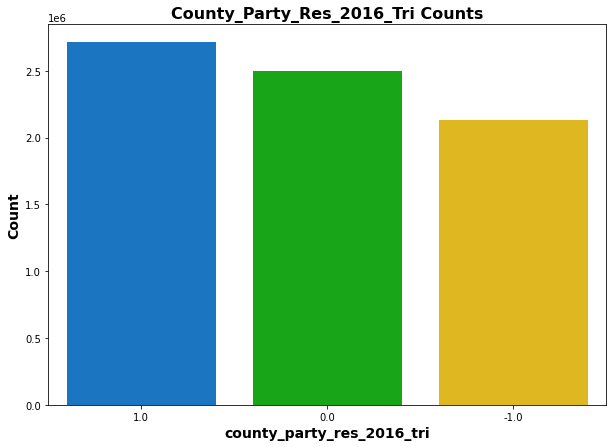

In [82]:
plot_count('county_party_res_2016_tri', elec_df);

In [83]:
check_unique('county_party_res_2016_tri', elec_df)

count      %
 1.0  2711791  36.91
 0.0  2500339  34.04
-1.0  2133965  29.05

## Numeric Variables

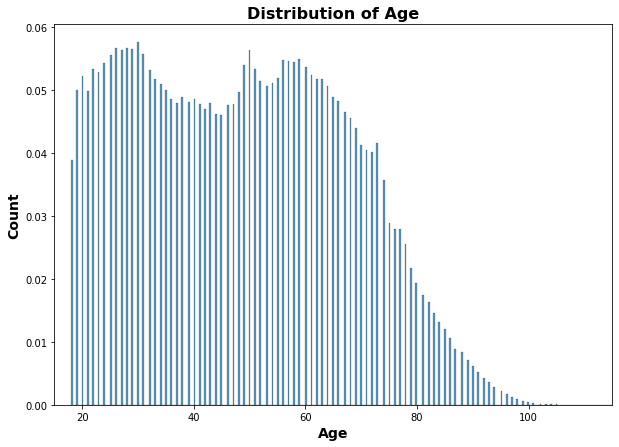

In [84]:
## Plot distribution of current age as of EOY 2020 
plt.figure(figsize=(10,7))
ax = sns.histplot(elec_df['birth_age_adj'], stat='density')
ax.set_title('Distribution of Age', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlim(15,115);

In [131]:
# fig = px.histogram(elec_df, x='birth_age_adj',
#                    color='Gen_2020', barmode='group', nbins=50)
# fig.show()

In [130]:
# fig = px.histogram(elec_df, x='birth_age_adj',
#                    color='party_grp', barmode='group', nbins=50)
# fig.show()

In [129]:
# fig = px.histogram(elec_df, x='county_party_res_2016',
#                    color='Gen_2020', barmode='group')
# fig.show()

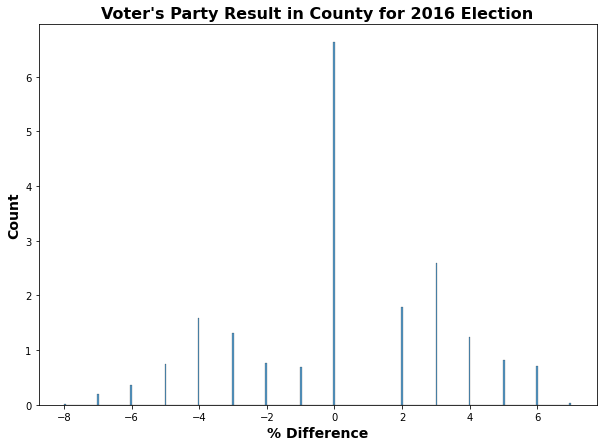

In [95]:
## Plot distribution of voter party results by county
plt.figure(figsize=(10,7))
ax = sns.histplot(elec_df['county_party_res_2016'], stat='density')
ax.set_title("Voter's Party Result in County for 2016 Election",
             fontsize=16, weight='bold')
ax.set_xlabel('% Difference', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold');

In [96]:
check_unique('county_party_res_2016', elec_df)

count      %
 0.0  2500339  34.04
 3.0   980160  13.34
 2.0   671959   9.15
-4.0   595805   8.11
-3.0   492146   6.70
 4.0   468271   6.37
 5.0   312246   4.25
-2.0   289276   3.94
-5.0   280612   3.82
 6.0   265095   3.61
-1.0   263891   3.59
-6.0   135563   1.85
-7.0    73157   1.00
 7.0    14060   0.19
-8.0     3515   0.05

## Load in Full Clean Dataset

In [93]:
# elec_df.to_csv('Data/NC_gen_2020_clean.gz', compression='gzip', index=False)

In [5]:
## Import and preview dataset
elec_df = pd.read_csv('Data/NC_gen_2020_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'super_court_abbrv': str, 
                            'judic_dist_abbrv': str,
                            'school_dist_abbrv': str,
                            'vtd_abbrv': str
                           })
elec_df.head()

ncid  no_vote_his  birth_age_adj     voting_method Gen_2020 party_cd  \
0   AA56273            0           85.0  ABSENTEE BY MAIL    Early      UNA   
1  AA201627            0           42.0  ABSENTEE ONESTOP    Early      UNA   
2  AA216996            0           54.0  ABSENTEE ONESTOP    Early      REP   
3   AA98377            0           44.0  ABSENTEE ONESTOP    Early      UNA   
4   AA69747            0           75.0  ABSENTEE ONESTOP    Early      UNA   

  gender_code  birth_year  registr_dt race_code ethnic_code  zip_code  \
0           F        1935  1984-10-01         W          NL   27253.0   
1           F        1978  2018-02-23         W          UN   27302.0   
2           M        1966  2020-10-31         W          UN   27302.0   
3           F        1976  1996-03-26         W          UN   27215.0   
4           F        1945  1989-08-15         W          NL   27215.0   

                    res_street_address res_city_desc state_cd birth_state  \
0  4430 E GREENSBORO-CHAPEL HILL RD           GRAHAM       NC          NY   
1                     117 W CLAY ST           MEBANE       NC          DC   
2               3670  COVINGTON TRL           MEBANE       NC          AL   
3                    421  WHITT AVE       BURLINGTON       NC          NC   
4                    1013  EDITH ST       BURLINGTON       NC          VA   

   drivers_lic  voted_county_id precinct_abbrv vtd_abbrv  cong_dist_abbrv  \
0            0              1.0            08N       08N             13.0   
1            1              1.0            10N       10N             13.0   
2            0              1.0            103       103             13.0   
3            1              1.0            03S       03S             13.0   
4            1              1.0            124       124             13.0   

  super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
0               15A              15A             24.0            64.0   
1               15A              15A             24.0            63.0   
2               15A              15A             24.0            63.0   
3               15A              15A             24.0            64.0   
4               15A              15A             24.0            63.0   

  school_dist_abbrv  county_id       diff  county_party_res_2016  \
0               NaN          1  12.551003                    0.0   
1               NaN          1  12.551003                    0.0   
2               NaN          1  12.551003                    2.0   
3               NaN          1  12.551003                    0.0   
4               NaN          1  12.551003                    0.0   

   county_party_res_2016_tri  Gen_2020_binary party_grp race_grp  \
0                        0.0                1     Other        W   
1                        0.0                1     Other        W   
2                        1.0                1       REP        W   
3                        0.0                1     Other        W   
4                        0.0                1     Other        W   

  birth_reg_cens birth_reg_other  
0      Northeast       Northeast  
1          South           South  
2          South           South  
3          South           South  
4          South           South

## Relationship to Target (Gen_2020 voting method)

In [6]:
method_by_party = elec_df.groupby(['Gen_2020', 'party_grp']).size().to_frame().reset_index()
method_by_party.rename(columns={0: 'Count'}, inplace=True)
method_by_party

Gen_2020 party_grp    Count
0          Early       DEM  1654622
1          Early     Other  1402389
2          Early       REP  1428133
3   Election Day       DEM   218234
4   Election Day     Other   290295
5   Election Day       REP   335189
6        No Vote       DEM   734705
7        No Vote     Other   799778
8        No Vote       REP   459318
9          Other       DEM     7739
10         Other     Other     7877
11         Other       REP     7816

In [113]:
def get_px_hist(df, group_col_1, group_col_2, title=None, barmode='group',
                template='seaborn'):
    
    cat_orders = {}
    labels = {}
    
    if group_col_2 == 'party_grp':
        color_map = {
            'Dem': 'blue',
            'Rep': 'red',
            'Other': 'gold'
        }
    if (group_col_1 == 'party_grp') | (group_col_2 == 'party_grp'):
        cat_orders.update({'party_grp': ['Dem', 'Rep', 'Other']})
        labels.update({'party_grp': 'Party'})
    
    
    if group_col_2 == 'Gen_2020':
        color_map = {
            'Early': 'navy',
            'No Vote': 'goldenrod',
            'Election Day': 'teal',
            'Other': 'aqua'
        }
    if (group_col_1 == 'Gen_2020') | (group_col_2 == 'Gen_2020'):
        cat_orders.update({'Gen_2020': ['Early', 'No Vote',
                                        'Election Day', 'Other']})
        labels.update({'Gen_2020': 'Voting Method'})
        
        
    if group_col_2 == 'race_grp':
        color_map = {
            'White': 'forestgreen',
            'Black': 'firebrick',
            'Undesig.': 'mediumslateblue',
            'Other': 'fuchsia'
        }
    if (group_col_1 == 'race_grp') | (group_col_2 == 'race_grp'):
        cat_orders.update({'race_grp': ['White',
                                        'Black',
                                        'Undesig.',
                                        'Other']})
        labels.update({'race_grp': 'Race'})
    
    
    if group_col_2 == 'gender_code':
        color_map = {
            'F': 'deeppink',
            'M': 'deepskyblue',
            'U': 'lawngreen'
        }
    if (group_col_1 == 'gender_code') | (group_col_2 == 'gender_code'):
        cat_orders.update({'gender_code': ['F', 'M', 'U']})
        labels.update({'gender_code': 'Gender'})
        
        
    if group_col_2 == 'birth_reg_other':
        color_map = {
            'South': '#AB63FA',
            'Missing': '#FFA15A',
            'Northeast': '#19D3F3',
            'Midwest': '#FF6692',
            'Other': '#B6E880',
            'West': '#FF97FF'
        }
    if (group_col_1 == 'birth_reg_other') | (group_col_2 == 'birth_reg_other'):
        cat_orders.update({'birth_reg_other': ['South',
                                               'Missing',
                                               'Northeast',
                                               'Midwest',
                                               'Other',
                                               'West']})
        labels.update({'birth_reg_other': 'Birth Region'})
    
    
    if group_col_2 == 'drivers_lic':
        color_map = {
            'Y': 'green',
            'N': 'crimson'
        }
    if (group_col_1 == 'drivers_lic') | (group_col_2 == 'drivers_lic'):
        cat_orders.update({'drivers_lic': ['Y', 'N']})
        labels.update({'drivers_lic': 'Drivers License'})
        
    
    fig = px.histogram(df, x=group_col_1, color=group_col_2,
                       color_discrete_map=color_map, barmode=barmode, 
                       title=title, 
                       category_orders=cat_orders,
                       labels=labels,
                       template=template
                      )
    
    return fig

In [114]:
def get_pie_count(df, group_col_1, group_col_2, col_1_cat, title=None,
                  template='seaborn'):
    
    labels={}
    
    if group_col_2 == 'party_grp':
        color_map = {
            'Dem': 'blue',
            'Rep': 'red',
            'Other': 'gold'
        }
        labels.update({'party_grp': 'Party'})
    
    if group_col_2 == 'Gen_2020':
        color_map = {
            'Early': 'navy',
            'No Vote': 'goldenrod',
            'Election Day': 'teal',
            'Other': 'aqua'
        }
        labels.update({'Gen_2020': 'Voting Method'})
        
    if group_col_2 == 'race_grp':
        color_map = {
            'White': 'forestgreen',
            'Black': 'firebrick',
            'Undesig.': 'mediumslateblue',
            'Other': 'fuchsia'
        }
        labels.update({'race_grp': 'Race'})
    
    if group_col_2 == 'gender_code':
        color_map = {
            'F': 'deeppink',
            'M': 'deepskyblue',
            'U': 'lawngreen'
        }
        labels.update({'gender_code': 'Gender'})
        
    if group_col_2 == 'birth_reg_other':
        color_map = {
            'South': '#AB63FA',
            'Missing': '#FFA15A',
            'Northeast': '#19D3F3',
            'Midwest': '#FF6692',
            'Other': '#B6E880',
            'West': '#FF97FF'
        }
        labels.update({'birth_reg_other': 'Birth Region'})
    
    
    if group_col_2 == 'drivers_lic':
        color_map = {
            'Y': 'green',
            'N': 'crimson'
        }
        labels.update({'drivers_lic': 'Drivers License'})
    
    
    grouped_df = df.groupby([group_col_1,
                             group_col_2]).size().to_frame().reset_index()
    grouped_df.rename(columns={0: 'Count'}, inplace=True)
    filtered_df = grouped_df.loc[grouped_df[group_col_1]==col_1_cat]
    
    fig = px.pie(filtered_df, values='Count', names=group_col_2,
                 title=title, color=group_col_2,
                 color_discrete_map=color_map,
                 template=template,
                 labels=labels)
    
    return fig

### By Age

In [ ]:
# fig = px.histogram(elec_df, x='birth_age_adj',
#                    color='Gen_2020', barmode='group', nbins=50)
# fig.show()

### By Party

In [63]:
# get_px_hist(elec_df, 'Gen_2020', 'party_grp', title='Voting Method by Party')

In [80]:
get_pie_count(elec_df, 'Gen_2020', 'party_grp', 'Early',
              title='Early Voters by Party')

In [81]:
get_pie_count(elec_df, 'Gen_2020', 'party_grp', 'Election Day',
              title='Election Day Voters by Party')

In [82]:
get_pie_count(elec_df, 'Gen_2020', 'party_grp', 'No Vote',
              title='Non-Voters by Party')

In [83]:
get_pie_count(elec_df, 'Gen_2020', 'party_grp', 'Other',
              title='Provisional/ Transfer Voters by Party')

In [84]:
get_pie_count(elec_df, 'party_grp', 'Gen_2020', 'DEM',
              title='Votes by Democratic Party')

In [85]:
get_pie_count(elec_df, 'party_grp', 'Gen_2020', 'REP',
              title='Votes by Republican Party')

In [86]:
get_pie_count(elec_df, 'party_grp', 'Gen_2020', 'Other',
              title='Votes by Other Voters')

### By Race

In [87]:
# get_px_hist(elec_df, 'Gen_2020', 'race_grp', title='Voting Method by Race')

In [88]:
get_pie_count(elec_df, 'Gen_2020', 'race_grp', 'Early',
              title='Early Voters by Race')

In [89]:
get_pie_count(elec_df, 'Gen_2020', 'race_grp', 'Election Day',
              title='Election Day Voters by Race')

In [90]:
get_pie_count(elec_df, 'Gen_2020', 'race_grp', 'No Vote',
              title='Non-Voters by Race')

In [91]:
get_pie_count(elec_df, 'Gen_2020', 'race_grp', 'Other',
              title='Provisional/ Transfer Voters by Race')

In [92]:
get_pie_count(elec_df, 'race_grp', 'Gen_2020', 'W',
              title='Votes by White Voters')

In [93]:
get_pie_count(elec_df, 'race_grp', 'Gen_2020', 'B',
              title='Votes by Black Voters')

In [94]:
get_pie_count(elec_df, 'race_grp', 'Gen_2020', 'U',
              title='Votes by Voters of Undesignated Race')

In [95]:
get_pie_count(elec_df, 'race_grp', 'Gen_2020', 'O',
              title='Votes by Voters of Other Racial Backgrounds')

### By Gender

In [96]:
# get_px_hist(elec_df, 'Gen_2020', 'gender_code', title='Voting Method by Gender')

In [97]:
get_pie_count(elec_df, 'Gen_2020', 'gender_code', 'Early',
              title='Early Voters by Gender')

In [98]:
get_pie_count(elec_df, 'Gen_2020', 'gender_code', 'Election Day',
              title='Election Day Voters by Gender')

In [99]:
get_pie_count(elec_df, 'Gen_2020', 'gender_code', 'No Vote',
              title='Non-Voters by Gender')

In [100]:
get_pie_count(elec_df, 'Gen_2020', 'gender_code', 'Other',
              title='Provisional/ Transfer Voters by Gender')

In [101]:
get_pie_count(elec_df, 'gender_code', 'Gen_2020', 'F',
              title='Votes by Women')

In [102]:
get_pie_count(elec_df, 'gender_code', 'Gen_2020', 'M',
              title='Votes by Men')

In [103]:
get_pie_count(elec_df, 'gender_code', 'Gen_2020', 'U',
              title='Votes by Voters of Undesignated Gender')

### By Birth Region

In [ ]:
get_px_hist(elec_df, 'Gen_2020', 'birth_reg_other', 
            title='Voting Method by Birth Region')

In [ ]:
get_pie_count(elec_df, 'Gen_2020', 'birth_reg_other', 'Early',
              title='Early Voters by Birth Region')

In [ ]:
get_pie_count(elec_df, 'Gen_2020', 'birth_reg_other', 'Election Day',
              title='Election Day Voters by Birth Region')

In [ ]:
get_pie_count(elec_df, 'Gen_2020', 'birth_reg_other', 'No Vote',
              title='Non-Voters by Birth Region')

In [ ]:
get_pie_count(elec_df, 'Gen_2020', 'birth_reg_other', 'Other',
              title='Provisional/ Transfer Voters by Birth Region')

In [ ]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'South',
              title='Votes by Voters from the South')

In [ ]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'Missing',
              title='Votes by Voters with Missing Birth Region')

In [ ]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'Northeast',
              title='Votes by Voters from the Northeast')

In [ ]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'Midwest',
              title='Votes by Voters from the Midwest')

In [ ]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'Other',
              title='Votes by Voters Born in U.S. Territories or Outside the U.S.')

In [66]:
get_pie_count(elec_df, 'birth_reg_other', 'Gen_2020', 'West',
              title='Votes by Voters from the West')

### By Possessing a Drivers License

In [124]:
# get_px_hist(elec_df, 'Gen_2020', 'drivers_lic', 
#             title='Voting Method by Voters with and without Drivers Licenses')

In [116]:
get_pie_count(elec_df, 'Gen_2020', 'drivers_lic', 'Early',
              title='Early Voters by Possession of Drivers License')

In [117]:
get_pie_count(elec_df, 'Gen_2020', 'drivers_lic', 'Election Day',
              title='Election Day Voters by Possession of Drivers License')

In [118]:
get_pie_count(elec_df, 'Gen_2020', 'drivers_lic', 'No Vote',
              title='Non-Voters by Possession of Drivers License')

In [119]:
get_pie_count(elec_df, 'Gen_2020', 'drivers_lic', 'Other',
              title='Provisional/ Transfer Voters by Possession of Drivers License')

In [122]:
get_pie_count(elec_df, 'drivers_lic', 'Gen_2020', 1,
              title='Votes by People with Drivers Licenses')

In [123]:
get_pie_count(elec_df, 'drivers_lic', 'Gen_2020', 0,
              title='Votes by People without Drivers Licenses')

### By County

In [130]:
# get_px_hist(elec_df, 'county_id', 'Gen_2020', 
#             title='Voting Method by County')

In [128]:
# get_px_hist(elec_df.loc[elec_df['county_id']==60], 'county_id', 'Gen_2020', 
#             title='Voting Method by County')

### By 2016 Party Performance within County

In [ ]:
# get_px_hist(elec_df, 'Gen_2020', 'county_party_res_2016_tri', 
#             title='Voting Method by 2016 Party Performance within County')

# MODEL

# INTERPRET

# Conclusions/Recommendations